<a href="https://colab.research.google.com/github/rodseidel/mpca/blob/master/IA_w4_Rodrigo_Seidel_project_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definições gerais

In [77]:
#Import dependências
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.spatial import distance

In [78]:
#Definições gerais
plt.rcParams['figure.figsize']=30,10
algoritmos = ['HILL CLIMBING','HILL CLIMBING COM RESTART','SIMULATED ANNEALING', 'ALGORITMO GENÉTICO']
problemas = ['PROBLEMA 1','PROBLEMA 2', 'PROBLEMA 3']
iniciais_problema1 = [-88.42356534,-74.17652733,-96.04533575,-46.20975576,-51.08525224,84.25824009,89.62662973,62.71057724,41.82046817,74.48850765]
iniciais_problema2 = [(-3.996687,-4.152387),(-2.548739,-2.712921),(-4.919496,-3.701581),(-4.152518,-5.693362),(-5.764245,-3.261190),(4.741434,3.587078),(3.396167,2.053729),(4.554253,2.603533),(4.731824,4.921208),(5.055210,5.181399)]
resultados_finais_p1 = []
resultados_finais_p2 = []
resultados_finais_p3 = []
colunas_resultados_finais = ['Algoritmo','Máximo','Mínimo','Média','Desvio Padrão']
standard_deviation = 2

#Definições de função de custo, ponto inicial, vizinho e algoritmos de busca

In [79]:
def inicial(problema, execucao):
  ret = []
  if problema == 'PROBLEMA 1':
    ret.append(iniciais_problema1[execucao])
    return ret
  elif problema == 'PROBLEMA 2':
    ret.append(iniciais_problema2[execucao])
    return ret
  else:
    return 0

In [80]:
def cost_function(problema,params):
  if problema == 'PROBLEMA 1':
    return (params[0]**2/100) + (10*np.sin(params[0]-(np.pi/2)))
  elif problema == 'PROBLEMA 2':
    return 20 + (params[0][0]**2 - (10*np.cos(2*np.pi*params[0][0]))) + (params[0][1]**2 - (10*np.cos(2*np.pi*params[0][1])))
  else:
    return 0

In [81]:
def inicial_ga(problema, tamanho_populacao):
    
    estado_inicial = []

    if problema == 'PROBLEMA 1':
      estado_inicial = iniciais_problema1
      populacao_a_gerar = tamanho_populacao-len(estado_inicial)

      novos_pontos = np.random.uniform(high=100,low=-100, size=populacao_a_gerar)

      for i in range(0, len(novos_pontos)):
        estado_inicial.append(novos_pontos[i])  

    elif problema == 'PROBLEMA 2':
      estado_inicial = iniciais_problema2
      populacao_a_gerar = tamanho_populacao-len(estado_inicial)

      novos_pontos = []
      novos_pontos_x = np.random.uniform(high=5.12,low=-5.12, size=populacao_a_gerar) 
      novos_pontos_y = np.random.uniform(high=5.12,low=-5.12, size=populacao_a_gerar) 

      for i in range(0,populacao_a_gerar):
        estado_inicial.append((novos_pontos_x[i],novos_pontos_y[i]))

    return estado_inicial

In [82]:
def vizinho(problema):
  ret = []
  if problema == 'PROBLEMA 1':
    ret.append(np.random.uniform(high=100,low=-100))
    return ret
  elif problema == 'PROBLEMA 2':
    ret.append((np.random.uniform(high=5.12,low=-5.12), np.random.uniform(high=5.12,low=-5.12)))
    return ret
  else:
    return 0

In [202]:
def vizinho_corrigido(problema, p): 
  ret = []
  if problema == 'PROBLEMA 1':
    #ret.append(np.random.uniform(high=100,low=-100))
    x = p[0] + (standard_deviation*np.random.randn())
    
    while(x < -100 or x > 100):
      x = p[0] + (standard_deviation*np.random.randn())
    ret.append(x)
    
    return ret
  
  elif problema == 'PROBLEMA 2':
    #ret.append((np.random.uniform(high=5.12,low=-5.12), np.random.uniform(high=5.12,low=-5.12)))
    x = (p[0][0] + (standard_deviation*np.random.randn()))
    y = (p[0][1] + (standard_deviation*np.random.randn()))

    while(x < -5.12 or x > 5.12):
      x = (p[0][0] + (standard_deviation*np.random.randn()))
    
    while(x < -5.12 or x > 5.12):
      y = (p[0][1] + (standard_deviation*np.random.randn()))

    ret.append([x,y])  #CORREÇÃO
    return ret
  else:
    return 0

In [120]:
def hill_climbing(problema, num_execucao, inicial_fn, vizinho_fn, custo_fn):
  resultado = []
    
  atual = custo_fn(problema,inicial_fn(problema,num_execucao))

  for i in range(0,1000):
    vizinho = custo_fn(problema, vizinho_fn(problema,atual))
    
    if vizinho < atual:
      atual = vizinho
      
    resultado.append(atual)

  return resultado

In [169]:
def hill_climbing_corrigido(problema, num_execucao, inicial_fn, vizinho_fn, custo_fn):
  resultado = []

  ponto = inicial_fn(problema,num_execucao)
  atual = custo_fn(problema,ponto)
  
  for i in range(0,1000):
    vizinho = custo_fn(problema, vizinho_fn(problema,ponto))
    
    if vizinho < atual:
      atual = vizinho
      ponto = vizinho_fn(problema,ponto)
      
    resultado.append(atual)

  return resultado

In [87]:
def hill_climbing_w_restart(problema, num_execucao, inicial_fn, vizinho_fn, custo_fn):
  resultado = []
  
  atual = custo_fn(problema,inicial_fn(problema,num_execucao))

  for i in range(0,1000):
    
    vizinho = custo_fn(problema, vizinho_fn(problema,atual))
    
    if i % 50 == 0 and i != 0: #restart a cada 50
      atual = vizinho
    elif vizinho < atual:
      atual = vizinho
      
    resultado.append(atual)

  return resultado

In [187]:
def hill_climbing_w_restart_corrigido(problema, num_execucao, inicial_fn, vizinho_fn, custo_fn):
  resultado = []
  
  ponto = inicial_fn(problema,num_execucao)
  atual = custo_fn(problema,inicial_fn(problema,num_execucao))

  for i in range(0,1000):
    
    vizinho = custo_fn(problema, vizinho_fn(problema,ponto))
    
    if i % 50 == 0 and i != 0: #restart a cada 50
      atual = vizinho
      ponto = vizinho_fn(problema,ponto)
    elif vizinho < atual:
      atual = vizinho
      ponto = vizinho_fn(problema,ponto)
      
    resultado.append(atual)

  return resultado

In [88]:
def simulated_annealing(problema, num_execucao, inicial_fn, vizinho_fn, custo_fn):
  resultado = []
  temperatura_inicial = 900
  temperatura = 900

  atual = custo_fn(problema,inicial_fn(problema,num_execucao))

  for i in range(0,1000):
    vizinho = custo_fn(problema, vizinho_fn(problema))
    
    tentativa = np.random.uniform(high=1,low=0)
    probabilidade = temperatura/temperatura_inicial

    if vizinho < atual or tentativa < probabilidade:
      atual = vizinho
      
    if temperatura > 0:
      temperatura -= 1
        
    resultado.append(atual)

  return resultado

In [208]:
def simulated_annealing_corrigido(problema, num_execucao, inicial_fn, vizinho_fn, custo_fn):
  resultado = []
  temperatura_inicial = 900
  temperatura = 900

  ponto = inicial_fn(problema,num_execucao)
  atual = custo_fn(problema,ponto)

  for i in range(0,1000):
    vizinho = custo_fn(problema, vizinho_fn(problema,ponto))
    
    tentativa = np.random.uniform(high=1,low=0)
    probabilidade = temperatura/temperatura_inicial

    if vizinho < atual or tentativa < probabilidade:
      atual = vizinho
      ponto = vizinho_fn(problema,ponto)
      
    if temperatura > 0:
      temperatura -= 1
        
    resultado.append(atual)

  return resultado

In [89]:
#GA
def crossover(problema, p1, p2):
  
  #Sejam p1 e p2 dois pontos escolhidos para produzirem filhos. A operação de crossover será dada pela média ponderada 
  #c1 = p1 α + p2 (1 - α) e c2 = p2 α + p1 (1 - α), onde α é um número aleatório amostrado de uma distribuição uniforme entre 0 e 1 
  alpha = np.random.uniform(low=0, high=1)
  
  if problema == 'PROBLEMA 1':

    c1 = p1*alpha + p2*(1 - alpha)
    c2 = p2*alpha + p1*(1 - alpha)

    return (c1, c2)

  elif problema == 'PROBLEMA 2':
      
      c1_X = p1[0]*alpha + p2[0]*(1 - alpha)
      c1_Y = p1[1]*alpha + p2[1]*(1 - alpha) 
        
      c2_X = p2[0]*alpha + p1[0]*(1 - alpha)
      c2_Y = p2[1]*alpha + p1[1]*(1 - alpha)

  return ((c1_X, c1_Y), (c2_X, c2_Y))

In [90]:
def mutacao(problema,p):
  standard_deviation = 2
#some ao estado um valor aleatório amostrado de uma distribuição normal com média 0 e desvio padrão 0.1 (veja [1]).
  
  if problema == "PROBLEMA 1":
    mutado_X = p + standard_deviation*np.random.randn()

    return mutado_X
   
  elif problema == "PROBLEMA 2":
    
    mutado_X = p[0] + standard_deviation*np.random.randn()
    mutado_Y = p[1] + standard_deviation*np.random.randn()
   
  return (mutado_X, mutado_Y)  

In [222]:
def torneio(populacao):
  individuos = populacao.copy()
  p1 = 0
  p2 = 0

  p1_cand1 = individuos.pop(int(np.trunc(np.random.uniform(low=0, high=len(individuos)))))
  p1_cand2 = individuos.pop(int(np.trunc(np.random.uniform(low=0, high=len(individuos)))))

  p2_cand1 = individuos.pop(int(np.trunc(np.random.uniform(low=0, high=len(individuos)))))
  p2_cand2 = individuos.pop(int(np.trunc(np.random.uniform(low=0, high=len(individuos)))))

  if p1_cand1 <= p1_cand2:
    p1 = p1_cand1
  else: 
    p1 = p1_cand2

  if p2_cand1 <= p2_cand2:
    p2 = p2_cand1
  else: 
    p2 = p2_cand2

  return p1,p2

In [220]:
def ga(problema, num_execucao, inicial_fn_ga):
  tamanho_populacao = 20
  geracoes = 50
  probabilidade_mutacao = 0.3
  populacao = inicial_fn_ga(problema, tamanho_populacao)
  #print("--- populacao inicial: ---")
  #print(populacao)
  #print('---------')
  result = []
  
  atual = populacao[0]

  for i in range(0, geracoes):
    proxima_geracao = []

    for j in range(0, int(tamanho_populacao/2)):
      
      #Dois pontos aleatórios na população
      #p1 = populacao[int(np.trunc(np.random.uniform(low=0, high=len(populacao))))]
      #p2 = populacao[int(np.trunc(np.random.uniform(low=0, high=len(populacao))))]
      p1,p2 = torneio(populacao) #CORREÇÃO
      
      #print("p1: " + str(p1) + " - p2: " + str(p2))
      c1, c2 = crossover(problema, p1, p2)
      #print("c1: " + str(c1) + " - c2: " + str(c2))

      if np.random.uniform(low=0,high=1) < probabilidade_mutacao:
        c1 = mutacao(problema, c1)
        #print("mut1: " + str(c1))

      if np.random.uniform(low=0,high=1) < probabilidade_mutacao:
        c2 = mutacao(problema, c2)
        #print("mut2: " + str(c2))

      proxima_geracao.extend((c1,c2))

      #print("--- proxima geracao: ---")
      #print(proxima_geracao)
      #print('---------')
    populacao = proxima_geracao

    #print("--- populacao ""final"": ---")
    #print(populacao)
    #print('---------')
    
    for n in populacao:
      #print("n: " + str(n))
      #print("atual_i: " + str(atual_i))
      #Transformacao em lista para uso na função de custo
      n_ = []
      n_.append((n))
      
      atual_ = []
      atual_.append((atual))
      #print(n_)
      #print(atual_i_)
      #print(atual_)

      if cost_function(problema,n_) < cost_function(problema,atual_):
          atual = n
      atual_ = []
      atual_.append((atual))
      result.append(cost_function(problema,atual_))
    
  return result

#Gráfico função objetivo

####Problema 1

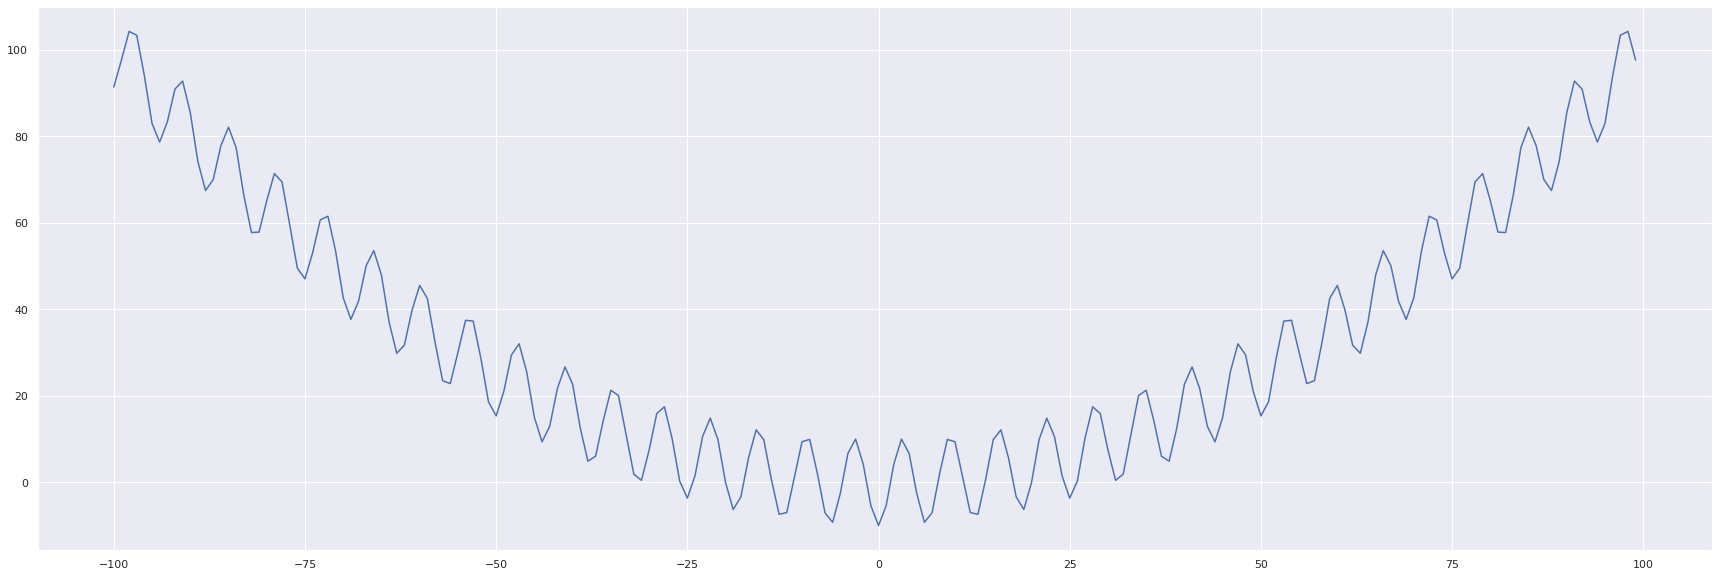

In [92]:
costs_p1 = []
for i in range(-100,100):
    p = []
    p.append(i)
    costs_p1.append(cost_function("PROBLEMA 1", p))

sns.lineplot(x=range(-100,100), y=costs_p1)

#Definição função para gráficos

In [93]:
def plot_performance(n_calls, mat_10_x_1000, color):
    mean = np.mean(mat_10_x_1000, axis=0)
    std = np.std(mat_10_x_1000, axis=0)
    plt.plot(n_calls, mean) 
    plt.fill_between(n_calls, mean-std, mean+std, alpha=0.3, facecolor=color)

#PROBLEMA 1

####Hill Climbing

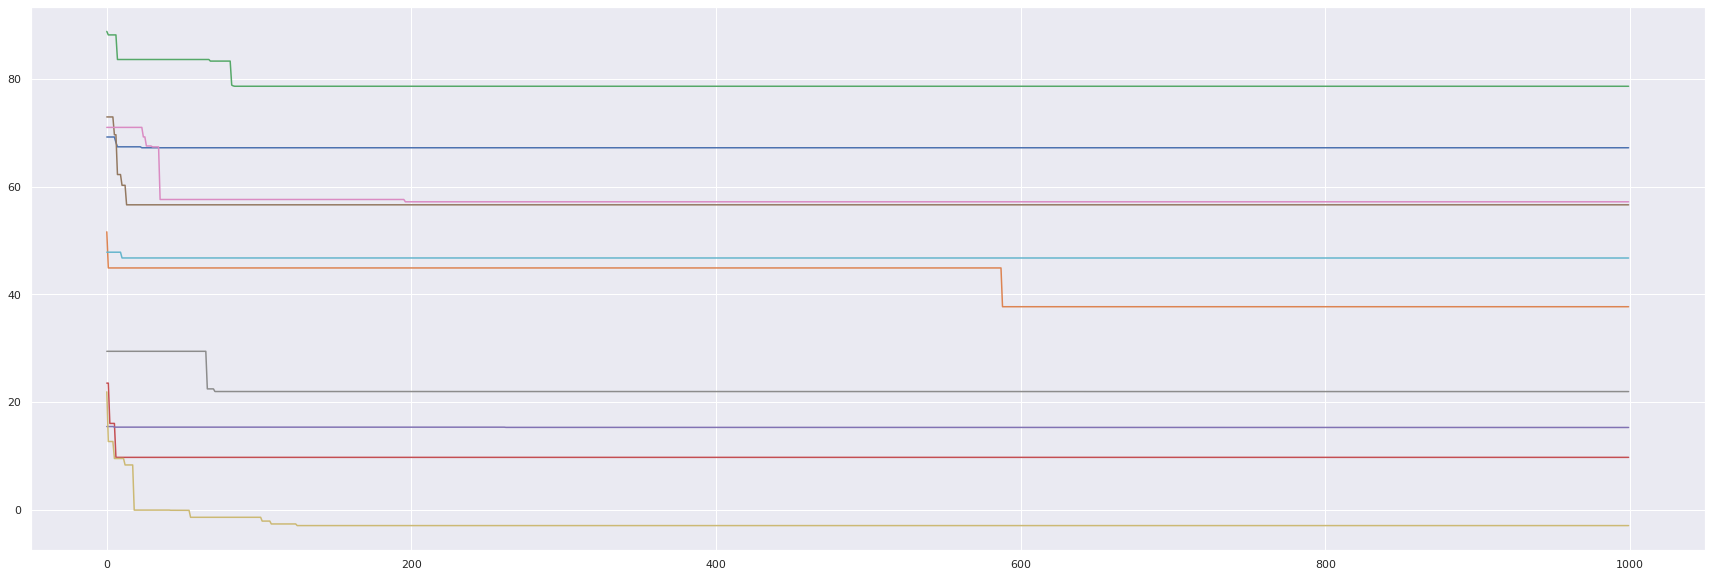

In [199]:
resultados_hc_p1 = []

for i in range(0, 10):
  resultado_hc_p1 = hill_climbing_corrigido('PROBLEMA 1', i, inicial, vizinho_corrigido, cost_function)

  resultados_hc_p1.append(resultado_hc_p1)

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,1000), y=resultado_hc_p1)

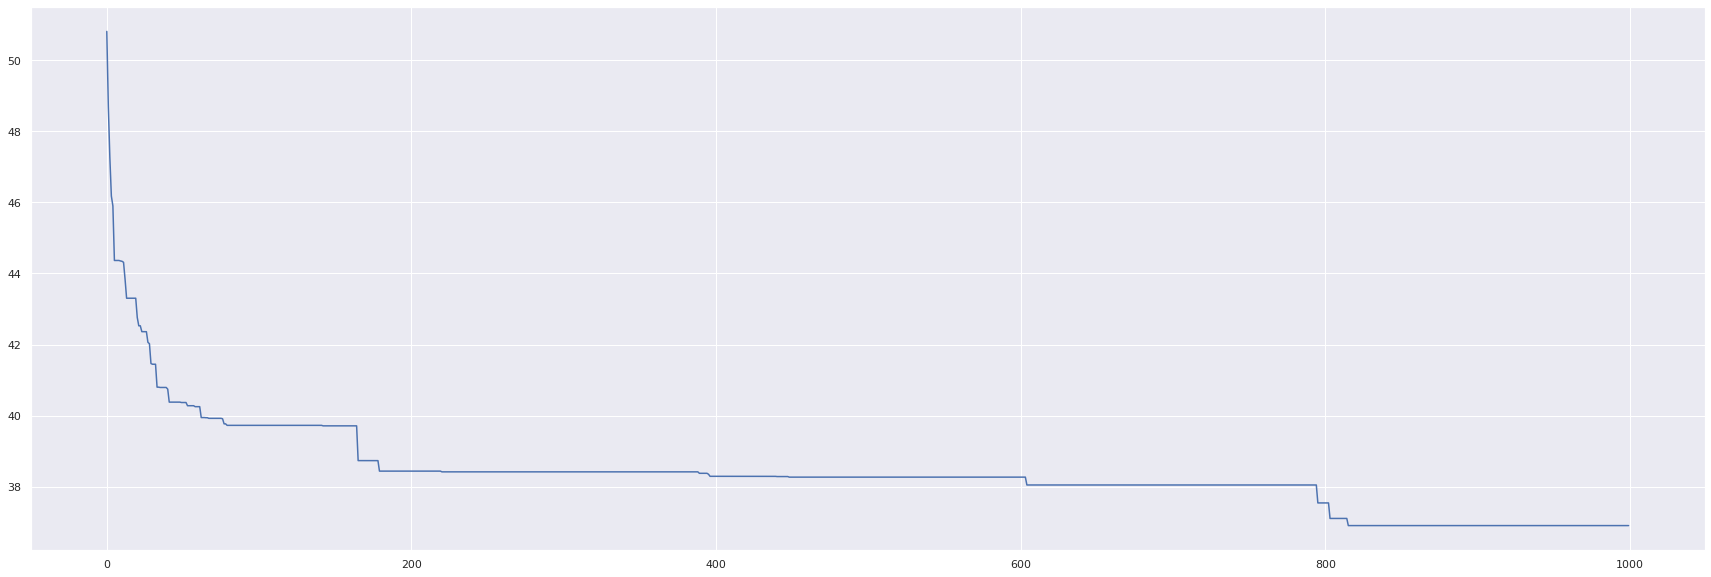

In [190]:
#Gráfico comparando a evolução da fitness entre as execuções
sns.set(style="darkgrid")

sns.lineplot(x=range(0,1000), y=np.mean(resultados_hc_p1, axis=0))

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_hc_p1 = []
for i in range(0,10):
  ultimos_resultados_hc_p1.append(resultados_hc_p1[i][999])

resultados_finais_p1.append([algoritmos[0], max(ultimos_resultados_hc_p1), min(ultimos_resultados_hc_p1), np.average(ultimos_resultados_hc_p1), np.std(ultimos_resultados_hc_p1)])

####Hill Climbing com restart

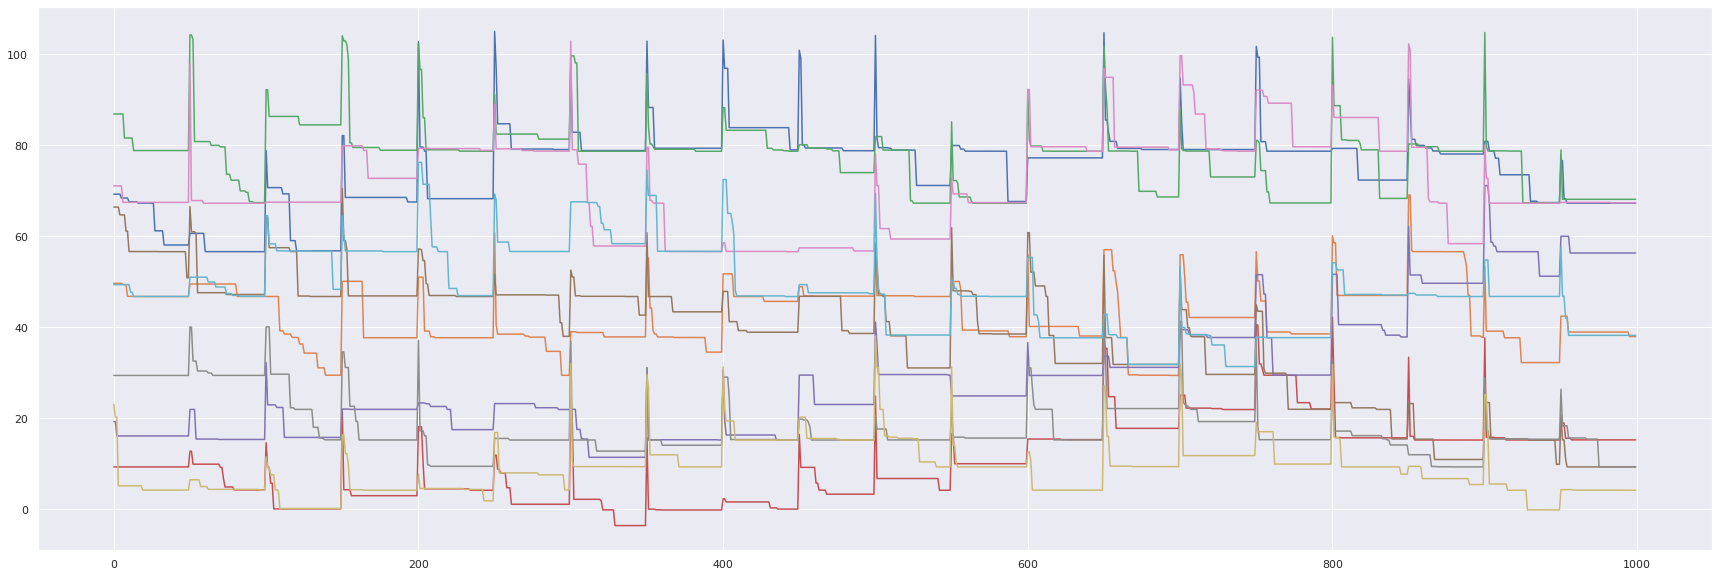

In [201]:
resultados_hcr_p1 = []

for i in range(0, 10):
  resultado_hcr_p1 = hill_climbing_w_restart_corrigido('PROBLEMA 1', i, inicial, vizinho_corrigido, cost_function)

  resultados_hcr_p1.append(resultado_hcr_p1)

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,1000), y=resultado_hcr_p1)

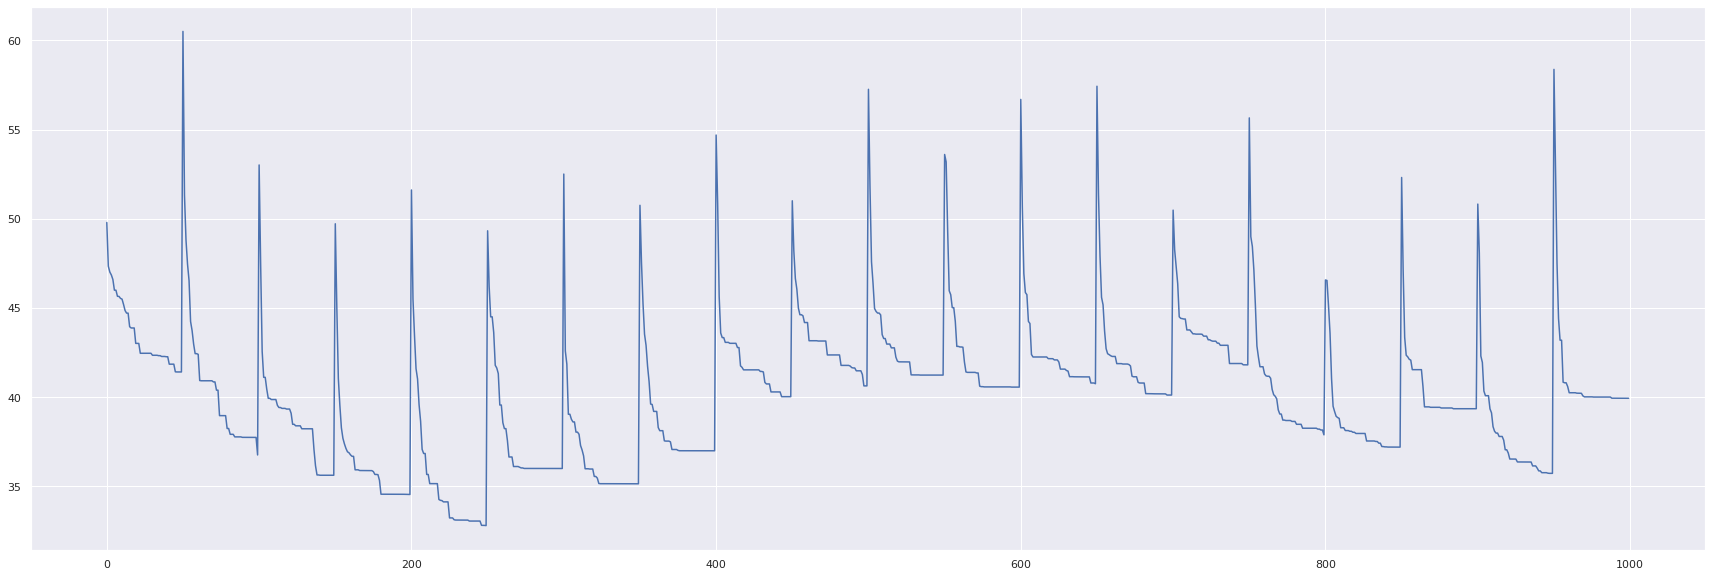

In [189]:
#Gráfico comparando a evolução da fitness entre as execuções
sns.set(style="darkgrid")

sns.lineplot(x=range(0,1000), y=np.mean(resultados_hcr_p1, axis=0))  

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_hcr_p1 = []
for i in range(0,10):
  ultimos_resultados_hcr_p1.append(resultados_hcr_p1[i][999])

resultados_finais_p1.append([algoritmos[1], max(ultimos_resultados_hcr_p1), min(ultimos_resultados_hcr_p1), np.average(ultimos_resultados_hcr_p1), np.std(ultimos_resultados_hcr_p1)])

####Simulated Annealing

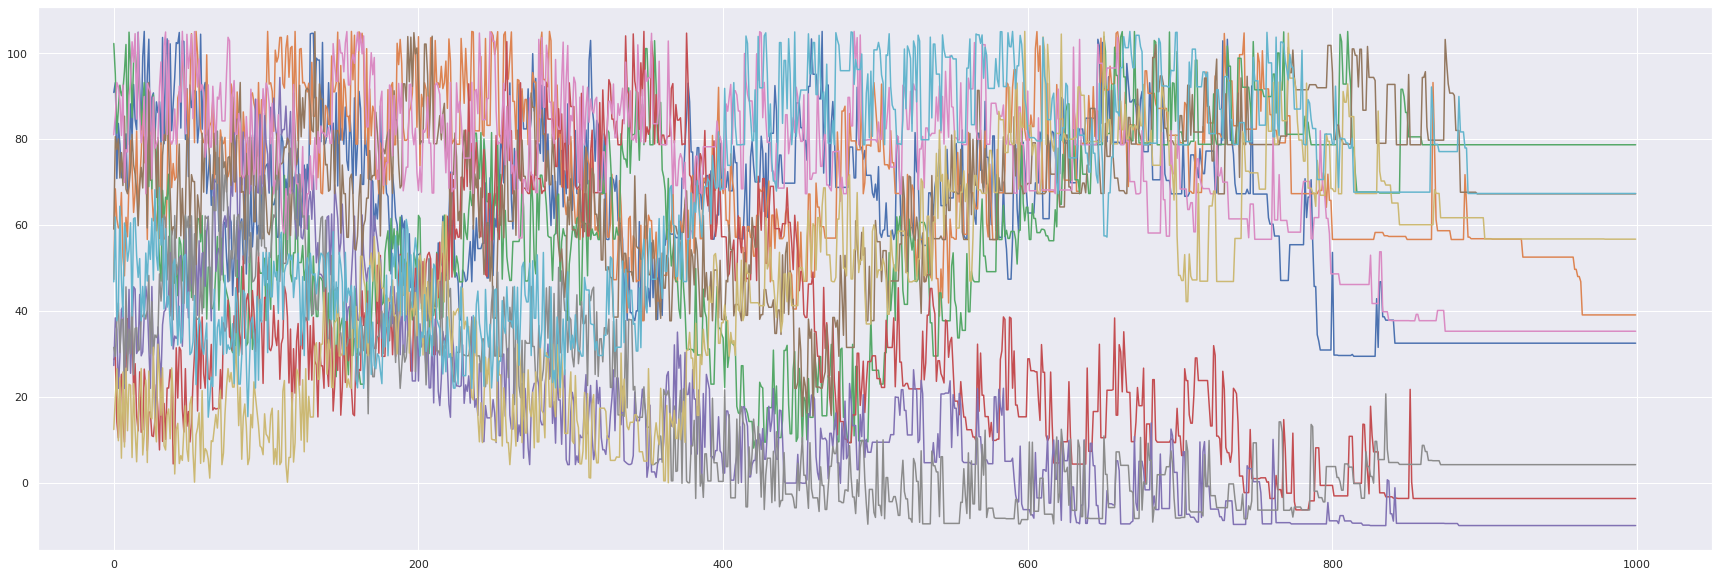

In [209]:
resultados_sa_p1 = []

for i in range(0, 10):
  resultado_sa_p1 = simulated_annealing_corrigido('PROBLEMA 1', i, inicial, vizinho_corrigido, cost_function)

  resultados_sa_p1.append(resultado_sa_p1)

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,1000), y=resultado_sa_p1)

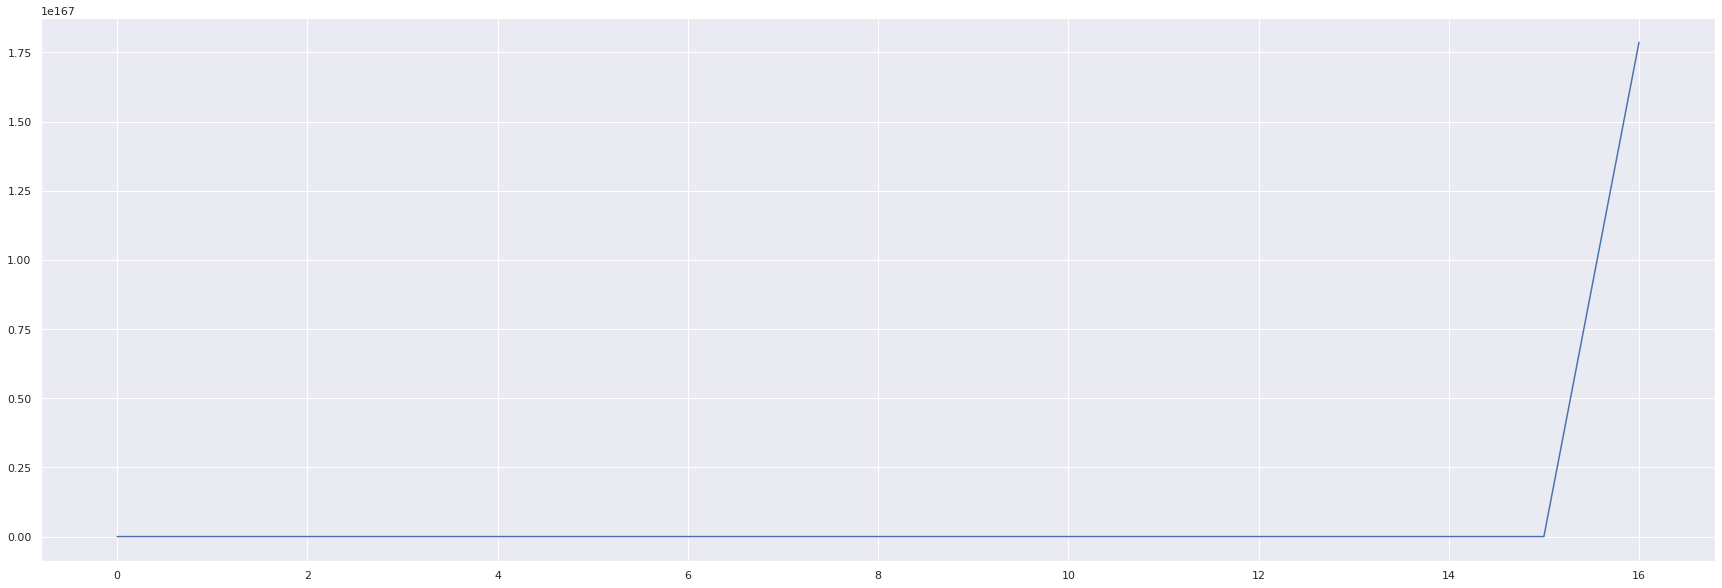

In [ ]:
#Gráfico comparando a evolução da fitness entre as execuções
sns.set(style="darkgrid")

sns.lineplot(x=range(0,1000), y=np.mean(resultados_sa_p1, axis=0))  

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_sa_p1 = []
for i in range(0,10):
  ultimos_resultados_sa_p1.append(resultados_sa_p1[i][999])

resultados_finais_p1.append([algoritmos[2], max(ultimos_resultados_sa_p1), min(ultimos_resultados_sa_p1), np.average(ultimos_resultados_sa_p1), np.std(ultimos_resultados_sa_p1)])

####GA

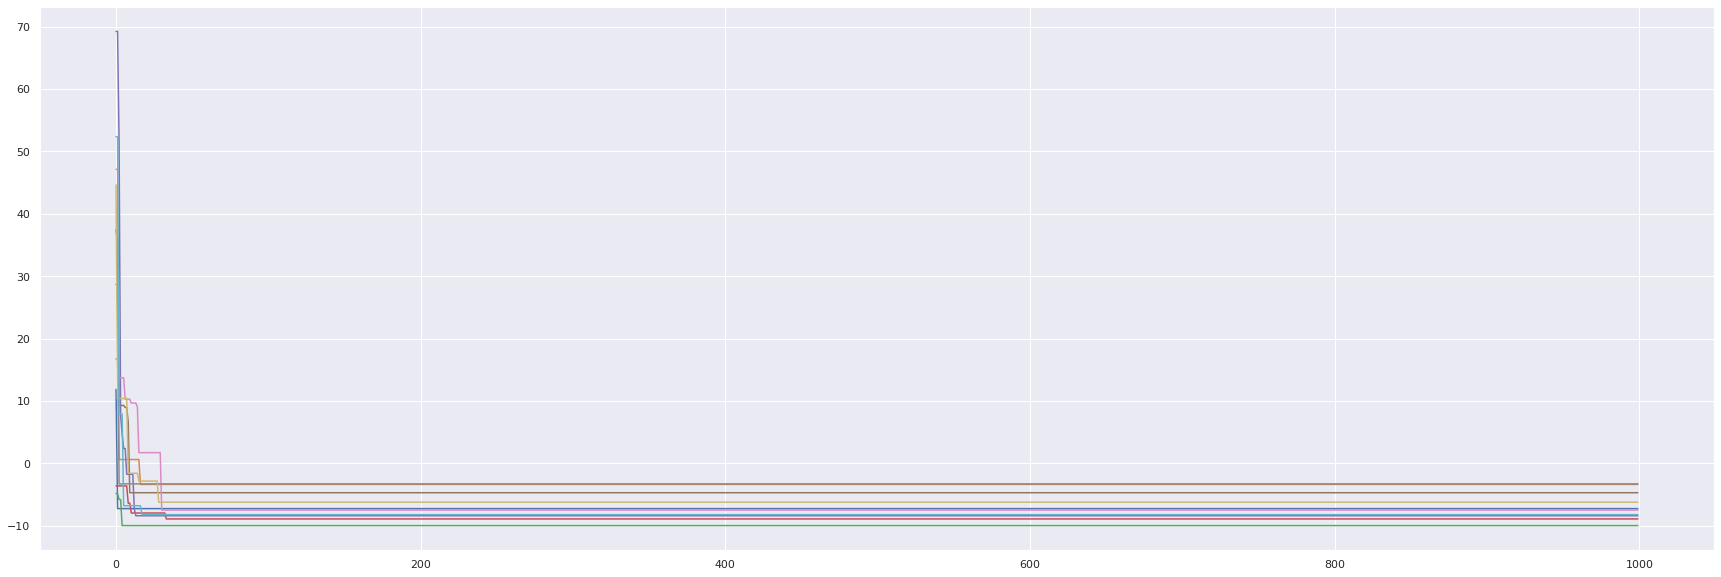

In [223]:
resultados_ga_p1 = []

for i in range(0, 10):
  resultado_ga_p1 = ga('PROBLEMA 1', i, inicial_ga)

  resultados_ga_p1.append(resultado_ga_p1)

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,1000), y=resultado_ga_p1)

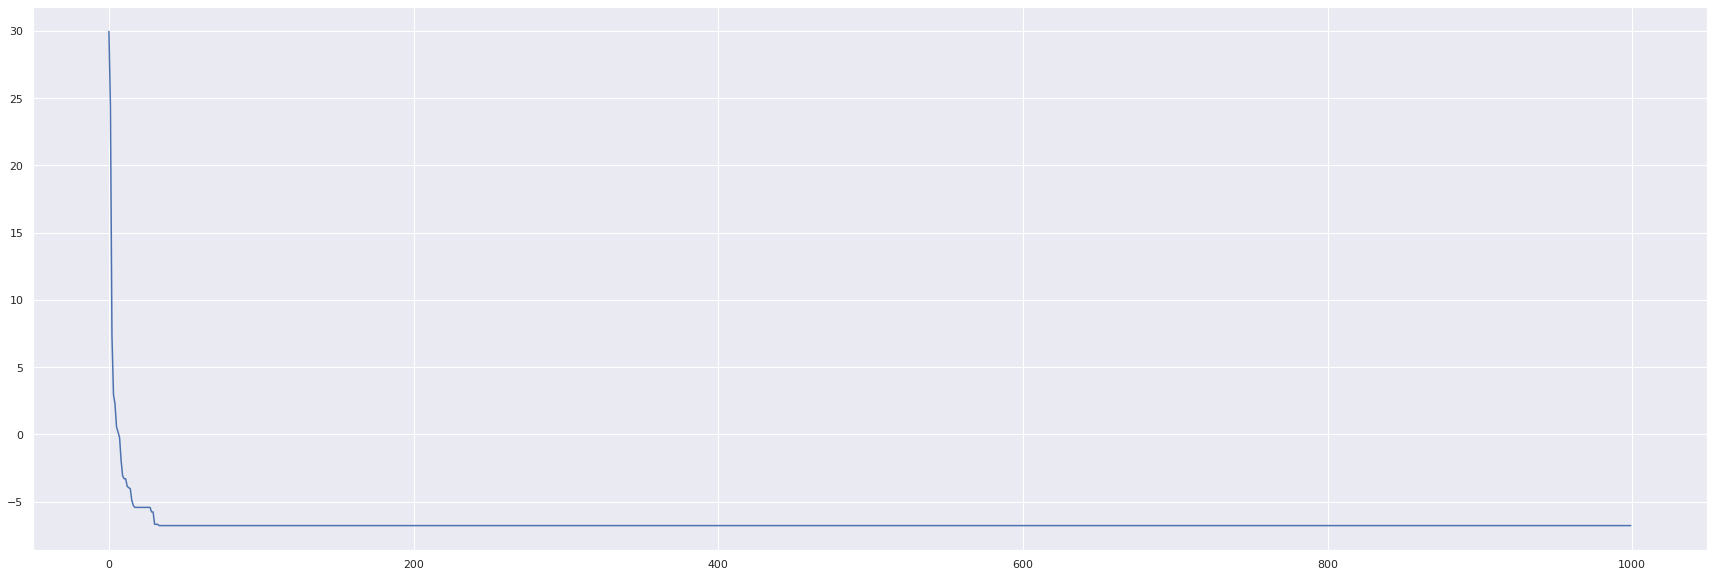

In [224]:
#Gráfico comparando a evolução da fitness entre as execuções
sns.set(style="darkgrid")

sns.lineplot(x=range(0,1000), y=np.mean(resultados_ga_p1, axis=0))  

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_ga_p1 = []
for i in range(0,10):
  ultimos_resultados_ga_p1.append(resultados_ga_p1[i][999])

resultados_finais_p1.append([algoritmos[3], max(ultimos_resultados_ga_p1), min(ultimos_resultados_ga_p1), np.average(ultimos_resultados_ga_p1), np.std(ultimos_resultados_ga_p1)])

####Gráfico comparativo

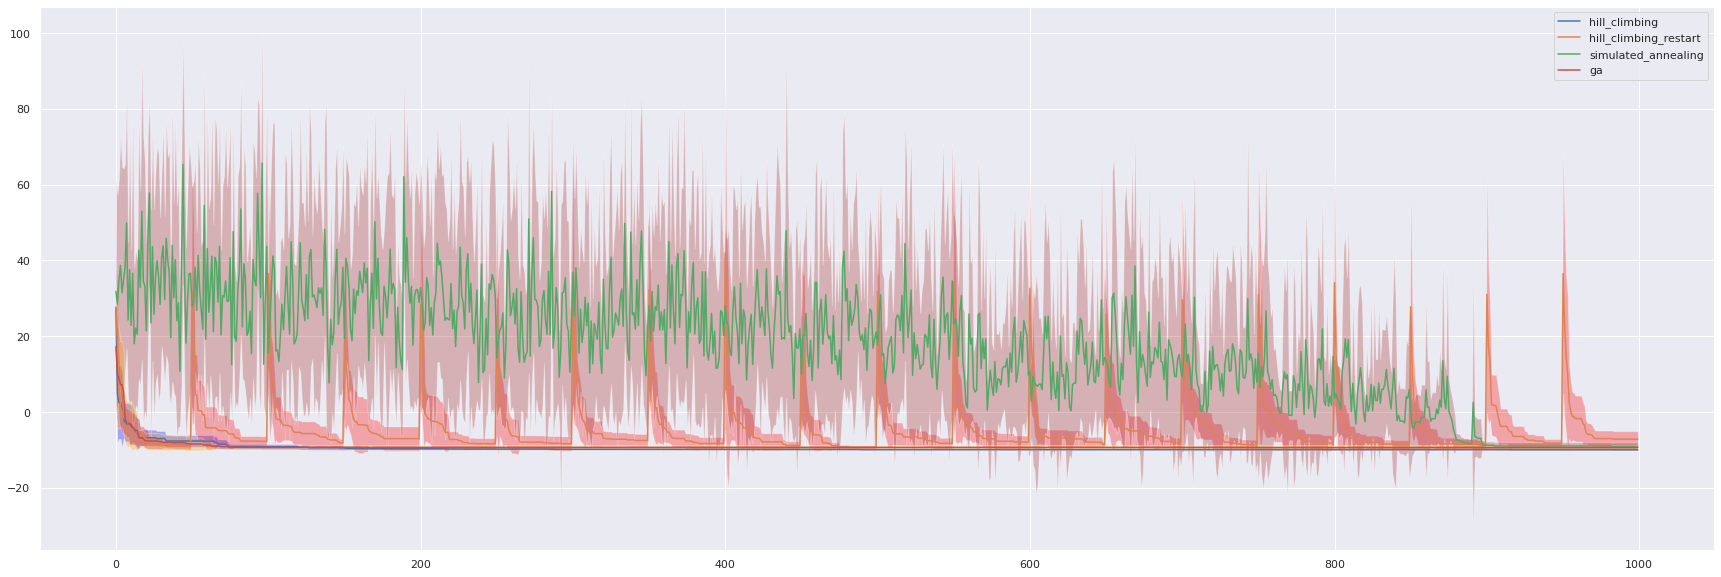

In [ ]:
n_obj_function_calls = range(1000)
plot_performance(n_obj_function_calls, resultados_hc_p1, 'blue')
plot_performance(n_obj_function_calls, resultados_hcr_p1, 'red')
plot_performance(n_obj_function_calls, resultados_sa_p1, 'brown')
plot_performance(n_obj_function_calls, resultados_ga_p1, 'orange')
plt.legend(['hill_climbing', 'hill_climbing_restart','simulated_annealing','ga'])
plt.show()

####Tabela Comparativa

In [ ]:
relatorio_final_problema1 = DataFrame (resultados_finais_p1,columns=colunas_resultados_finais)
relatorio_final_problema1

,Algoritmo,Máximo,Mínimo,Média,Desvio Padrão
0,HILL CLIMBING,-9.793968,-9.999860,-9.965739,0.059376
1,HILL CLIMBING COM RESTART,-3.368412,-9.473282,-7.158273,2.110118
2,SIMULATED ANNEALING,-6.410354,-9.984057,-9.171068,1.080358
3,ALGORITMO GENÉTICO,-8.061440,-9.999968,-9.390432,0.669149


####Discussão

No problema 1, observando-se os gráficos de evolução dos algoritmos, o gráfico comparativo e a tabela comparativa final, o GA obteve o mínimo bem mais rapidamente que os demais algoritmos. 
O Simulated Annealing conferiu, com as mudanças de temperatura, mais regiões mas e por conta disso demorou mais tempo para se chegar ao mínimo. 

O Hill Climbing com restart testou uma maior variedade de pontos porém nas minhas execuções encontrou um mínimo pior que o Hill Climbing.

#PROBLEMA 2

####Hill Climbing

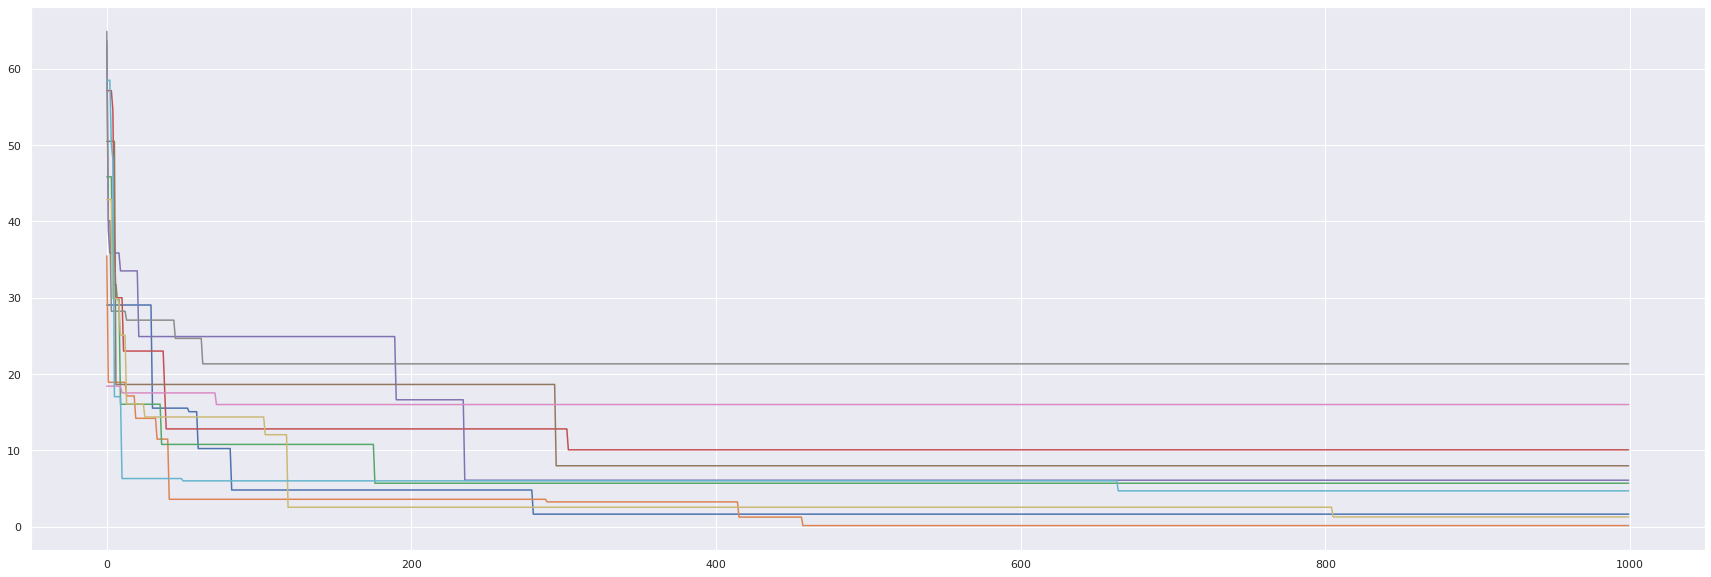

In [203]:
resultados_hc_p2 = []

for i in range(0, 10):
  resultado_hc_p2 = hill_climbing_corrigido('PROBLEMA 2', i, inicial, vizinho_corrigido, cost_function)

  resultados_hc_p2.append(resultado_hc_p2)

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,1000), y=resultado_hc_p2)

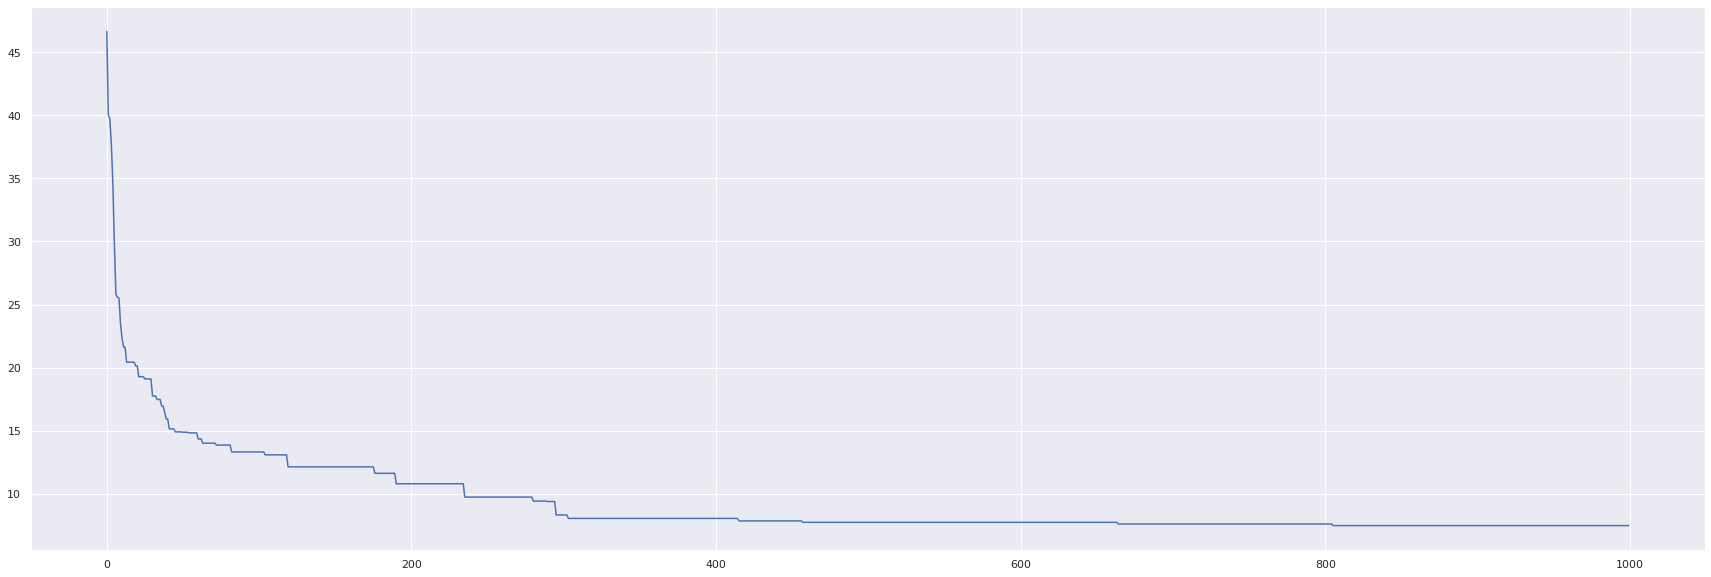

In [204]:
#Gráfico comparando a evolução da fitness entre as execuções
sns.set(style="darkgrid")

sns.lineplot(x=range(0,1000), y=np.mean(resultados_hc_p2, axis=0)) 

In [205]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_hc_p2 = []
for i in range(0,10):
  ultimos_resultados_hc_p2.append(resultados_hc_p2[i][999])

resultados_finais_p2.append([algoritmos[0], max(ultimos_resultados_hc_p2), min(ultimos_resultados_hc_p2), np.average(ultimos_resultados_hc_p2), np.std(ultimos_resultados_hc_p2)])

####Hill Climbing com restart

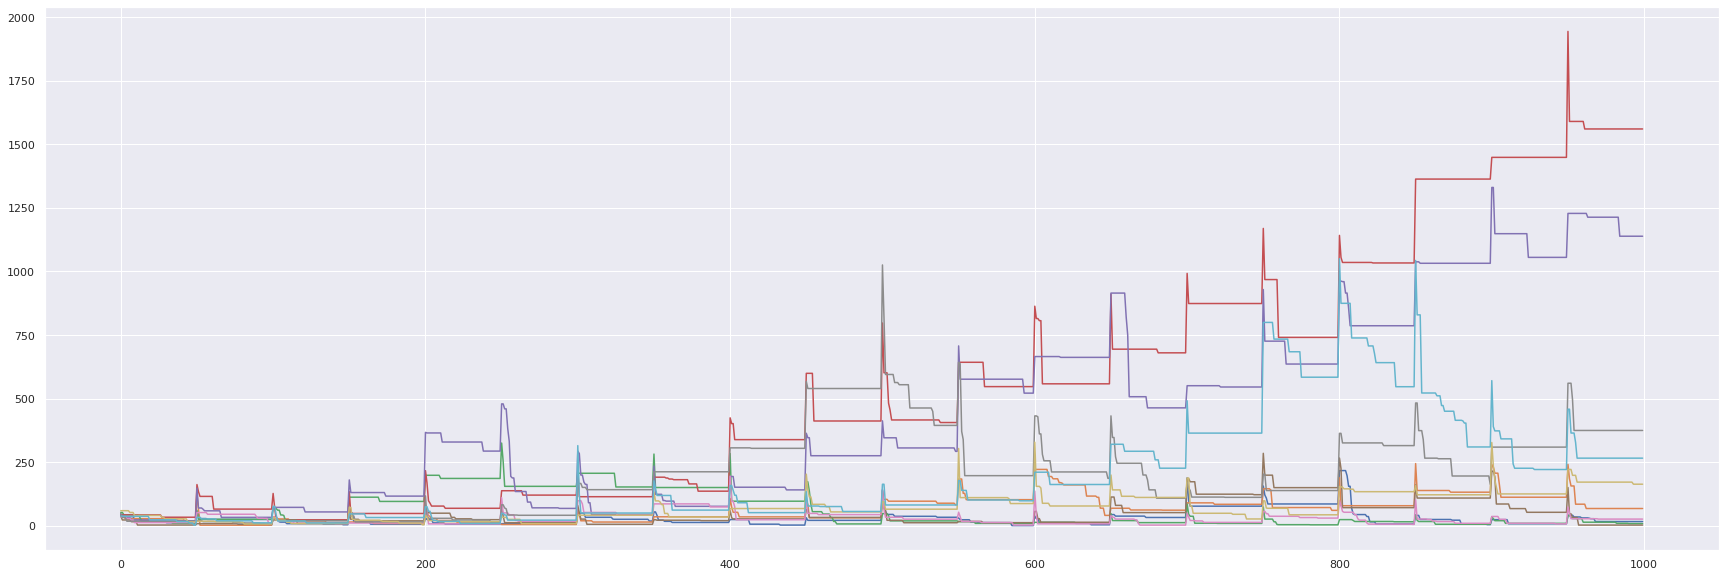

In [206]:
resultados_hcr_p2 = []

for i in range(0, 10):
  resultado_hcr_p2 = hill_climbing_w_restart_corrigido('PROBLEMA 2', i, inicial, vizinho_corrigido, cost_function)

  resultados_hcr_p2.append(resultado_hcr_p2)

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,1000), y=resultado_hcr_p2)

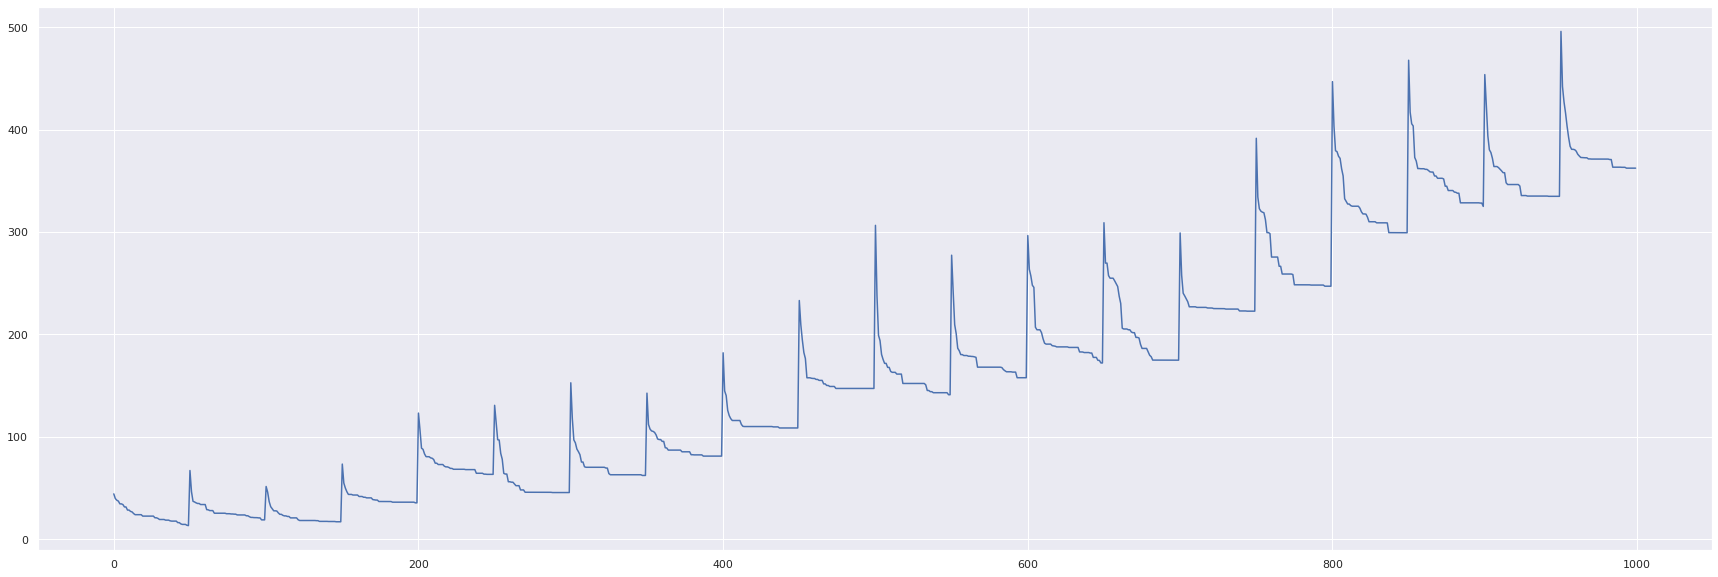

In [207]:
#Gráfico comparando a evolução da fitness entre as execuções
sns.set(style="darkgrid")

sns.lineplot(x=range(0,1000), y=np.mean(resultados_hcr_p2, axis=0)) 

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_hcr_p2 = []
for i in range(0,10):
  ultimos_resultados_hcr_p2.append(resultados_hcr_p2[i][999])

resultados_finais_p2.append([algoritmos[1], max(ultimos_resultados_hcr_p2), min(ultimos_resultados_hcr_p2), np.average(ultimos_resultados_hcr_p2), np.std(ultimos_resultados_hcr_p2)])

####Simulated Annealing

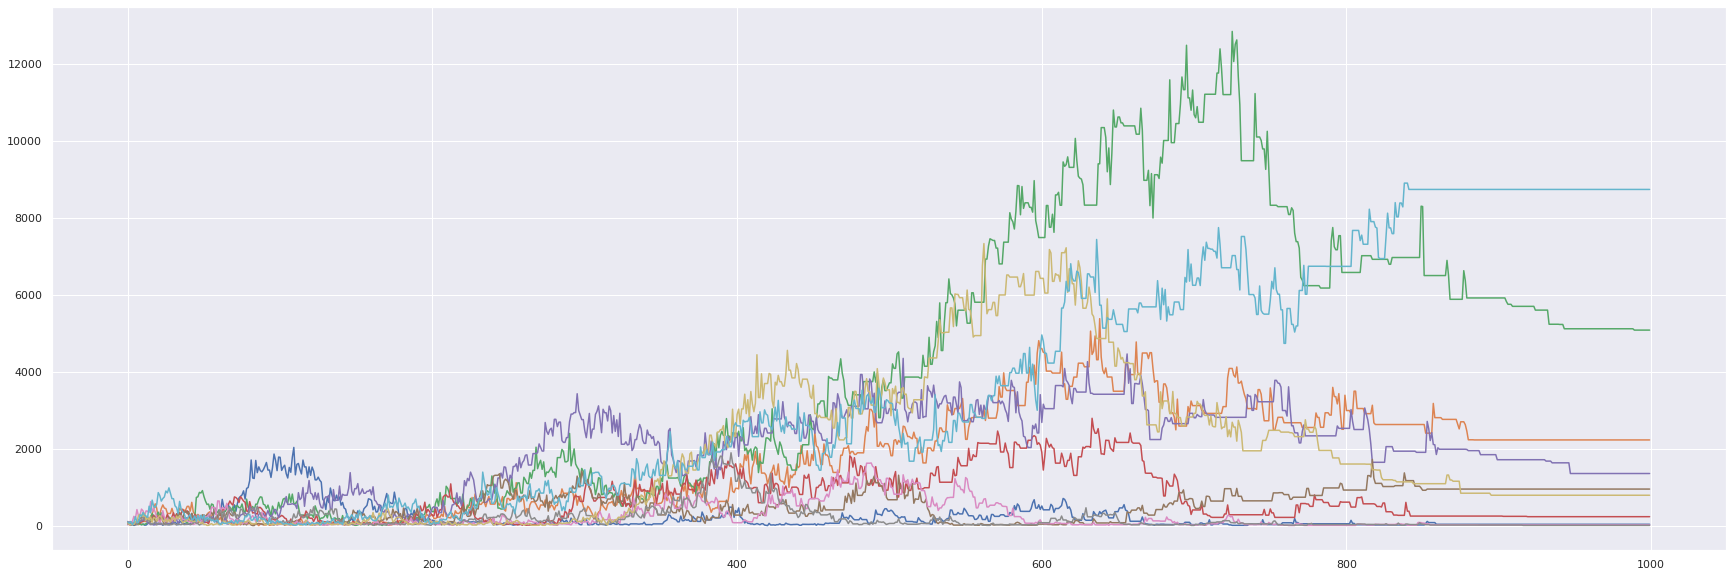

In [211]:
resultados_sa_p2 = []

for i in range(0, 10):
  resultado_sa_p2 = simulated_annealing_corrigido('PROBLEMA 2', i, inicial, vizinho_corrigido, cost_function)

  resultados_sa_p2.append(resultado_sa_p2)

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,1000), y=resultado_sa_p2)

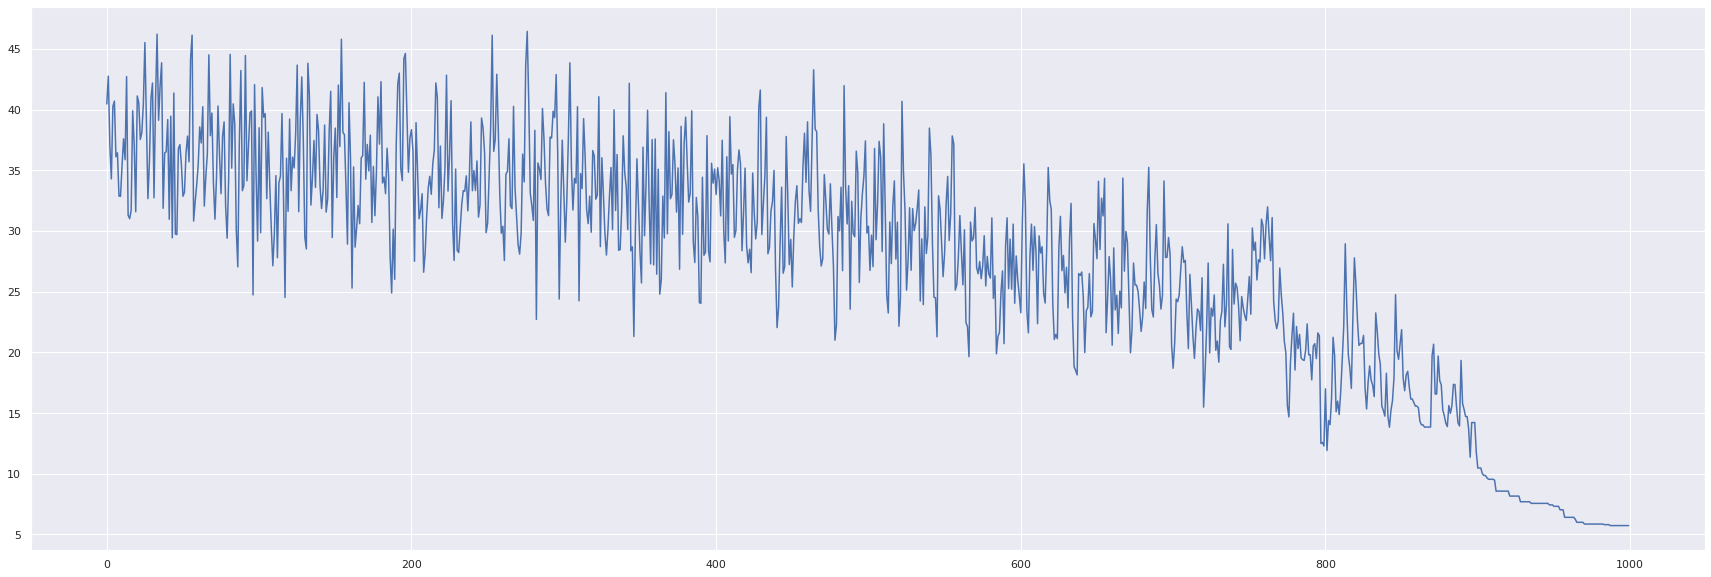

In [ ]:
#Gráfico comparando a evolução da fitness entre as execuções
sns.set(style="darkgrid")

sns.lineplot(x=range(0,1000), y=np.mean(resultados_sa_p2, axis=0)) 

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_sa_p2 = []
for i in range(0,10):
  ultimos_resultados_sa_p2.append(resultados_sa_p2[i][999])

resultados_finais_p2.append([algoritmos[2], max(ultimos_resultados_sa_p2), min(ultimos_resultados_sa_p2), np.average(ultimos_resultados_sa_p2), np.std(ultimos_resultados_sa_p2)])

####GA

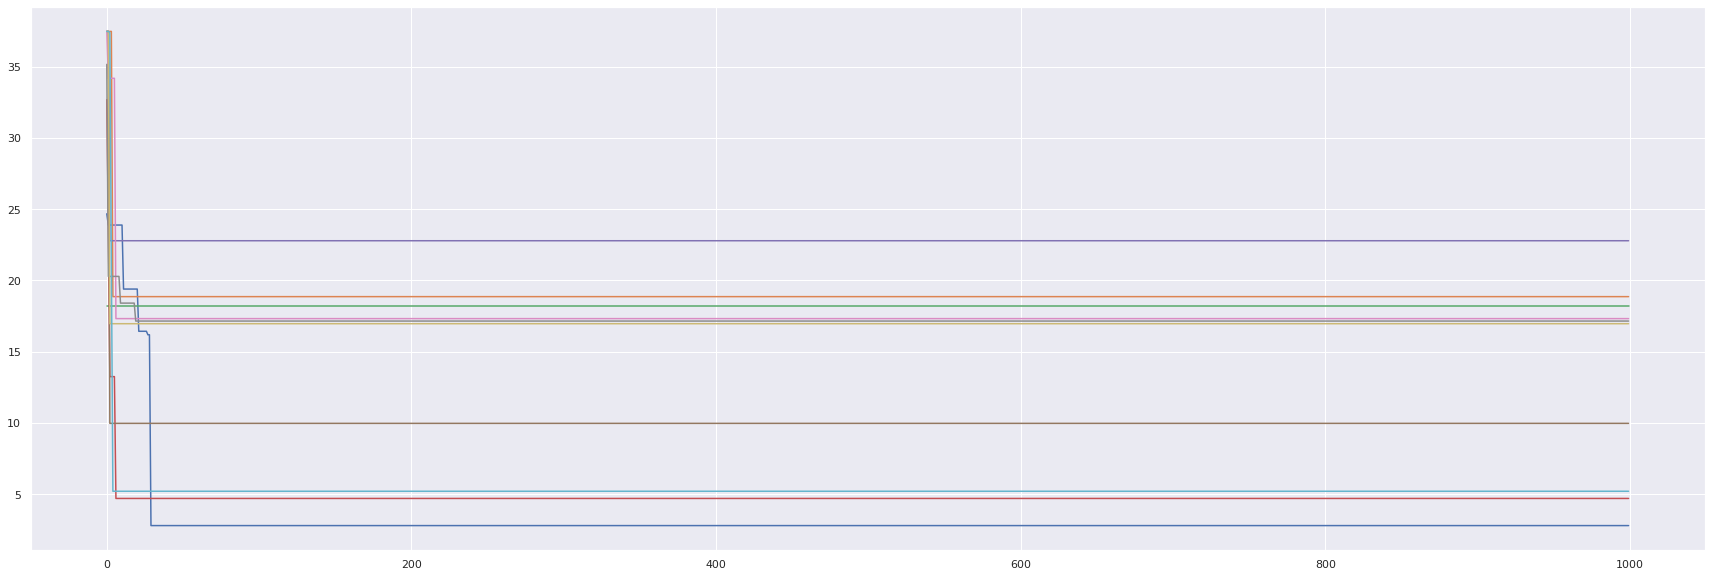

In [225]:
resultados_ga_p2 = []

for i in range(0, 10):
  resultado_ga_p2 = ga('PROBLEMA 2', i, inicial_ga)

  resultados_ga_p2.append(resultado_ga_p2)

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,1000), y=resultado_ga_p2)

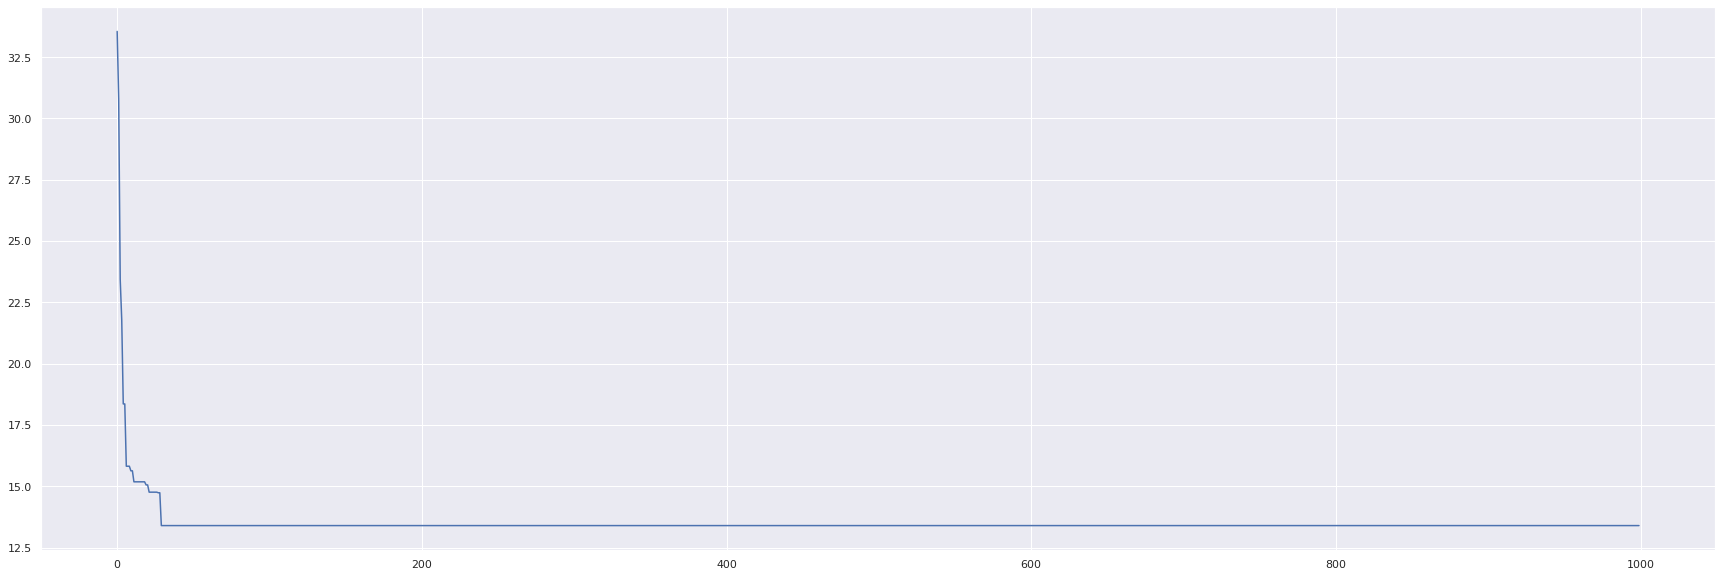

In [226]:
#Gráfico comparando a evolução da fitness entre as execuções
sns.set(style="darkgrid")

sns.lineplot(x=range(0,1000), y=np.mean(resultados_ga_p2, axis=0)) 

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_ga_p2 = []
for i in range(0,10):
  ultimos_resultados_ga_p2.append(resultados_ga_p2[i][999])

resultados_finais_p2.append([algoritmos[3], max(ultimos_resultados_ga_p2), min(ultimos_resultados_ga_p2), np.average(ultimos_resultados_ga_p2), np.std(ultimos_resultados_ga_p2)])

####Gráfico Comparativo

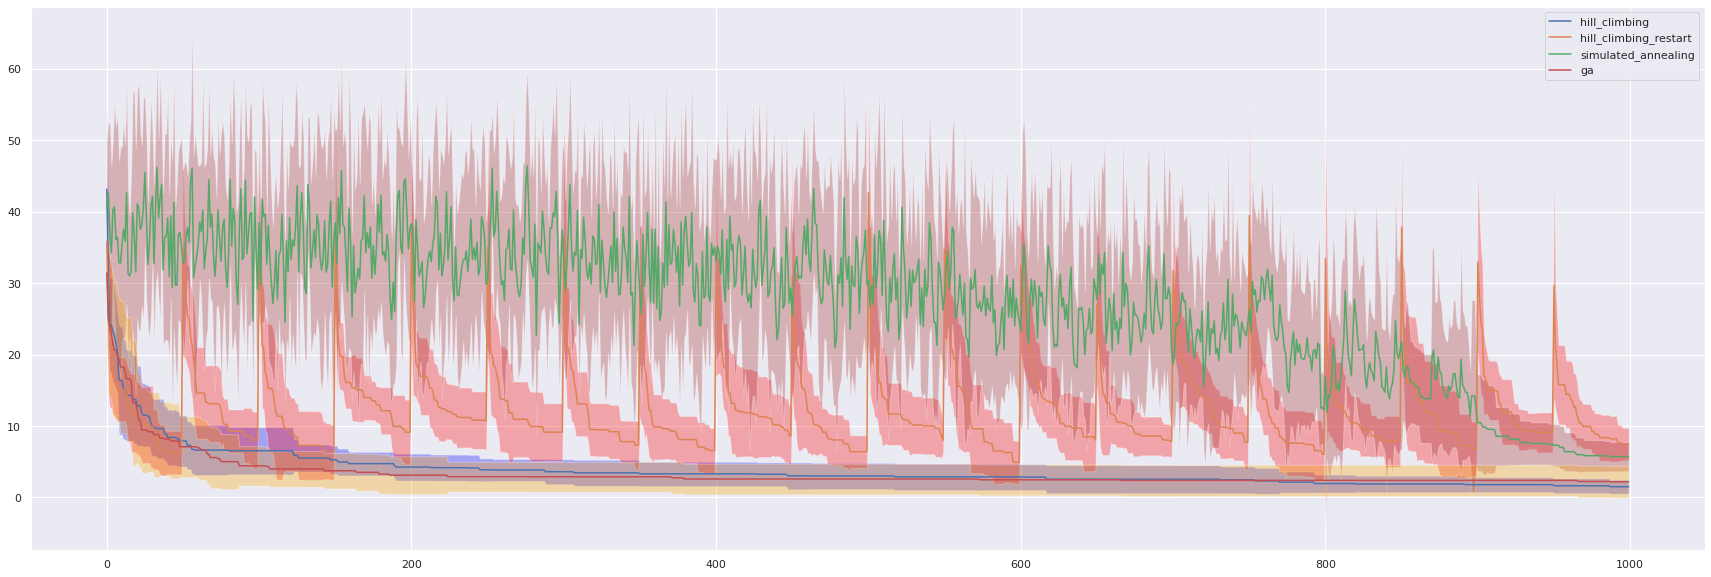

In [ ]:
n_obj_function_calls = range(1000)
plot_performance(n_obj_function_calls, resultados_hc_p2, 'blue')
plot_performance(n_obj_function_calls, resultados_hcr_p2, 'red')
plot_performance(n_obj_function_calls, resultados_sa_p2, 'brown')
plot_performance(n_obj_function_calls, resultados_ga_p2, 'orange')
plt.legend(['hill_climbing', 'hill_climbing_restart','simulated_annealing','ga'])
plt.show()

####Tabela Comparativa

In [ ]:
relatorio_final_problema2 = DataFrame (resultados_finais_p2,columns=colunas_resultados_finais)
relatorio_final_problema2

,Algoritmo,Máximo,Mínimo,Média,Desvio Padrão
0,HILL CLIMBING,3.836493,0.361393,1.508708,0.969263
1,HILL CLIMBING COM RESTART,11.909292,3.377939,7.478744,2.270404
2,SIMULATED ANNEALING,9.308536,2.992458,5.725746,2.052930
3,ALGORITMO GENÉTICO,8.372039,0.234323,2.196590,2.236810


####Discussão

Neste problema 2, observando-se os gráficos de evolução dos algoritmos, o gráfico comparativo e a tabela comparativa final, o GA obteve o mínimo com um número de execuções próximo ao Hill Climbing, diferentemente do ocorrido no problema 1. 

O Simulated Annealing conferiu, com as mudanças de temperatura, mais regiões mas e por conta disso usou quase todas as iterações para se chegar ao mínimo, mas não obteve um bom resultado, assim como o Hill Climbing com Restart.


#PROBLEMA 3

####Definição de funções

In [ ]:
cidades5 = [(9.340596780273533,0.944644983514447),(9.453687199297686,4.296319873487294),(3.954576491945417,-5.678210088392472),
    (9.525489095524836,-9.875394895908203),(-4.940352752331121,-1.304169351911085)]

cidades10 = [(0.9701402142106161,0.8797074102376001),(8.181770830879042,7.0846248063834025),(-0.07712137750422343,3.9721858910577694),
    (3.733371632055352,6.6998510725052185),(2.1421261194286583,-2.54738692880877),(-2.220915673767035,-4.112497129729418),
    (0.15908796673666892,7.5403803382850825),(-8.276413817305874,6.208957261216149),(-3.0288821940271156,3.510752587262811),
    (6.703035457463709,-5.079996439520553)]

cidades38 = [(11003.611100,42102.500000),(11108.611100,42373.888900),(11133.333300,42885.833300),(11155.833300,42712.500000),(11183.333300,42933.333300),
    (11297.500000,42853.333300),(11310.277800,42929.444400),(11416.666700,42983.333300),(11423.888900,43000.277800),(11438.333300,42057.222200),
    (11461.111100,43252.777800),(11485.555600,43187.222200),(11503.055600,42855.277800),(11511.388900,42106.388900),(11522.222200,42841.944400),
    (11569.444400,43136.666700),(11583.333300,43150.000000),(11595.000000,43148.055600),(11600.000000,43150.000000),(11690.555600,42686.666700),
    (11715.833300,41836.111100),(11751.111100,42814.444400),(11770.277800,42651.944400),(11785.277800,42884.444400),(11822.777800,42673.611100),
    (11846.944400,42660.555600),(11963.055600,43290.555600),(11973.055600,43026.111100),(12058.333300,42195.555600),(12149.444400,42477.500000),
    (12286.944400,43355.555600),(12300.000000,42433.333300),(12355.833300,43156.388900),(12363.333300,43189.166700),(12372.777800,42711.388900),
    (12386.666700,43334.722200),(12421.666700,42895.555600),(12645.000000,42973.333300)]

In [ ]:
def inicial_p3(cidades):
  ret = []
  ret.append(cidades[0])
  return ret

In [ ]:
from scipy.spatial import distance

def cost_function_p3(cidades): ##lista de cidades percorridas
  custo_caminho = 0

  #calcula o custo da cidade inicial mais as cidades percorridas
  for i in range(0, len(cidades)):
    proxima_cidade = cidades[i+1] if i < len(cidades) - 1 else cidades[0]

    custo_caminho +=distance.euclidean(cidades[i], proxima_cidade)
                                       
  return custo_caminho

In [ ]:
def vizinho_p3(cidades_percorridas, lista_cidades):

  lista_completa = lista_cidades[:]
  
  for i in range(0,len(cidades_percorridas)):
    lista_completa.remove(cidades_percorridas[i])
  
  cidades_disponiveis = lista_completa  
  if len(cidades_disponiveis) == 1:
    return cidades_disponiveis
  else:
    #Devolve cidade aleatória
    return cidades_disponiveis[int(np.trunc(np.random.uniform(low=0, high=len(cidades_disponiveis))))]

In [ ]:
def hill_climbing_p3(inicial_fn, vizinho_fn, custo_fn, lista_cidades):
  custo_total = 0
  atual = []
  vizinho = []
  custo_com_vizinho = 0
  atual_com_vizinho = []
  primeira_execucao = True
  tentativas = []

  atual = inicial_fn(lista_cidades)
  #print("atual inicial: " + str(atual))
  vizinho = vizinho_fn(atual,lista_cidades)
  #print("vizinho inicial: " + str(vizinho))
  atual.append(vizinho)
  #print("atual com viz:" + str(atual))
  #print("custo inicial: " + str(custo_fn(atual)))
  i = 0

  #O limitador com o contador foi necessário pois por algum motivo q não identifiquei 
  #eventualmente ficava em looping infinito
  while len(atual) < len(lista_cidades) and i < 10000: 
    #print("tam_atual: " + str(len(atual)))  
    #print("tam_list_cid: " + str(len(lista_cidades)))  
    if not(primeira_execucao):
      vizinho = vizinho_fn(atual,lista_cidades)
      atual_com_vizinho.append(vizinho)
      #print("atual:" + str(atual))
      #print("vizinho:" + str(vizinho))
    
      i += 1
    #print(atual)

    custo_com_vizinho = custo_fn(atual_com_vizinho)
    
    if not(primeira_execucao):
      if custo_com_vizinho < custo_fn(atual):
        atual.append(vizinho)
        custo_total = custo_fn(atual)
      else: 
        #remove o último vizinho adicionado
        atual_com_vizinho.pop()
    
    primeira_execucao = False
    tentativas.append(custo_total)

  #Volta a cidade_inicial
  atual.append(inicial_fn(lista_cidades)[0]) 
  volta = []
  volta.append(inicial_fn(lista_cidades))
  volta.append(atual[-1])
  custo_total += custo_fn(volta)

  return atual, custo_total, tentativas

In [ ]:
def hill_climbing_w_restart_p3(inicial_fn, vizinho_fn, custo_fn, lista_cidades):
  custo_total = 0
  atual = []
  vizinho = []
  custo_com_vizinho = 0
  atual_com_vizinho = []
  primeira_execucao = True
  tentativas = []

  atual = inicial_fn(lista_cidades)
  #print("atual inicial: " + str(atual))
  vizinho = vizinho_fn(atual,lista_cidades)
  #print("vizinho inicial: " + str(vizinho))
  atual.append(vizinho)
  #print("atual com viz:" + str(atual))
  #print("custo inicial: " + str(custo_fn(atual)))
  i = 0

  #O limitador com o contador foi necessário pois por algum motivo q não identifiquei 
  #eventualmente ficava em looping infinito
  while len(atual) < len(lista_cidades) and i < 10000: 
    #print("tam_atual: " + str(len(atual)))  
    #print("tam_list_cid: " + str(len(lista_cidades)))  
    if not(primeira_execucao):
      vizinho = vizinho_fn(atual,lista_cidades)
      atual_com_vizinho.append(vizinho)
      #print("atual:" + str(atual))
      #print("vizinho:" + str(vizinho))
    
      i += 1
    #print(atual)

    custo_com_vizinho = custo_fn(atual_com_vizinho)
    
    if not(primeira_execucao):
      if custo_com_vizinho < custo_fn(atual) or i % 50 == 0:
        atual.append(vizinho)
        custo_total = custo_fn(atual)
      else: 
        #remove o último vizinho adicionado
        atual_com_vizinho.pop()
    
    primeira_execucao = False
    tentativas.append(custo_total)

  #Volta a cidade_inicial
  atual.append(inicial_fn(lista_cidades)[0]) 
  volta = []
  volta.append(inicial_fn(lista_cidades))
  volta.append(atual[-1])
  custo_total += custo_fn(volta)

  return atual, custo_total, tentativas

In [ ]:
def simulated_annealing_p3(inicial_fn, vizinho_fn, custo_fn, lista_cidades):
  custo_total = 0
  atual = []
  vizinho = []
  tentativas = []
  temperatura_inicial = 900
  temperatura = 900

  custo_com_vizinho = 0
  atual_com_vizinho = []
  primeira_execucao = True

  atual = inicial_fn(lista_cidades)
  #print("atual inicial: " + str(atual))
  vizinho = vizinho_fn(atual,lista_cidades)
  #print("vizinho inicial: " + str(vizinho))
  atual.append(vizinho)
  #print("atual com viz:" + str(atual))
  #print("custo inicial: " + str(custo_fn(atual)))
  cont = 0

  #for i in range(0,100000):
  while len(atual) < len(lista_cidades):
    #print("tam_atual: " + str(len(atual)))  
    #print("tam_list_cid: " + str(len(lista_cidades)))  
    if not(primeira_execucao):
      vizinho = vizinho_fn(atual,lista_cidades)
      atual_com_vizinho.append(vizinho)
      #print("atual:" + str(atual))
      #print("vizinho:" + str(vizinho))
    
      cont += 1
    #print(atual)

    tentativa = np.random.uniform(high=1,low=0)
    probabilidade = temperatura/temperatura_inicial

    custo_com_vizinho = custo_fn(atual_com_vizinho)
    
    if not(primeira_execucao):
      if custo_com_vizinho < custo_fn(atual) or tentativa < probabilidade:
        atual.append(vizinho)
        custo_total = custo_fn(atual)
      else: 
        #remove o último vizinho adicionado
        atual_com_vizinho.pop()  

    primeira_execucao = False
    tentativas.append(custo_total)

  #Volta a cidade_inicial
  atual.append(inicial_fn(lista_cidades)[0]) 
  volta = []
  volta.append(inicial_fn(lista_cidades))
  volta.append(atual[-1])
  custo_total += custo_fn(volta)

  return atual, custo_total, tentativas

####Hill Climbing

Cidades Visitadas: [(11003.6111, 42102.5), (12149.4444, 42477.5), (11822.7778, 42673.6111), (12386.6667, 43334.7222), (11715.8333, 41836.1111), (11511.3889, 42106.3889), (11183.3333, 42933.3333), (11133.3333, 42885.8333), (11595.0, 43148.0556), (12355.8333, 43156.3889), (12421.6667, 42895.5556), (12300.0, 42433.3333), (11438.3333, 42057.2222), (12058.3333, 42195.5556), (12372.7778, 42711.3889), (11485.5556, 43187.2222), (12645.0, 42973.3333), (11785.2778, 42884.4444), (11461.1111, 43252.7778), (11973.0556, 43026.1111), (11423.8889, 43000.2778), (11600.0, 43150.0), (11416.6667, 42983.3333), (11690.5556, 42686.6667), (11155.8333, 42712.5), (11583.3333, 43150.0), (11770.2778, 42651.9444), (12363.3333, 43189.1667), (11846.9444, 42660.5556), (11310.2778, 42929.4444), (12286.9444, 43355.5556), (11503.0556, 42855.2778), (11522.2222, 42841.9444), (11108.6111, 42373.8889), (11297.5, 42853.3333), (11569.4444, 43136.6667), (11751.1111, 42814.4444), [(11963.0556, 43290.5556)], (11003.6111, 42102.5

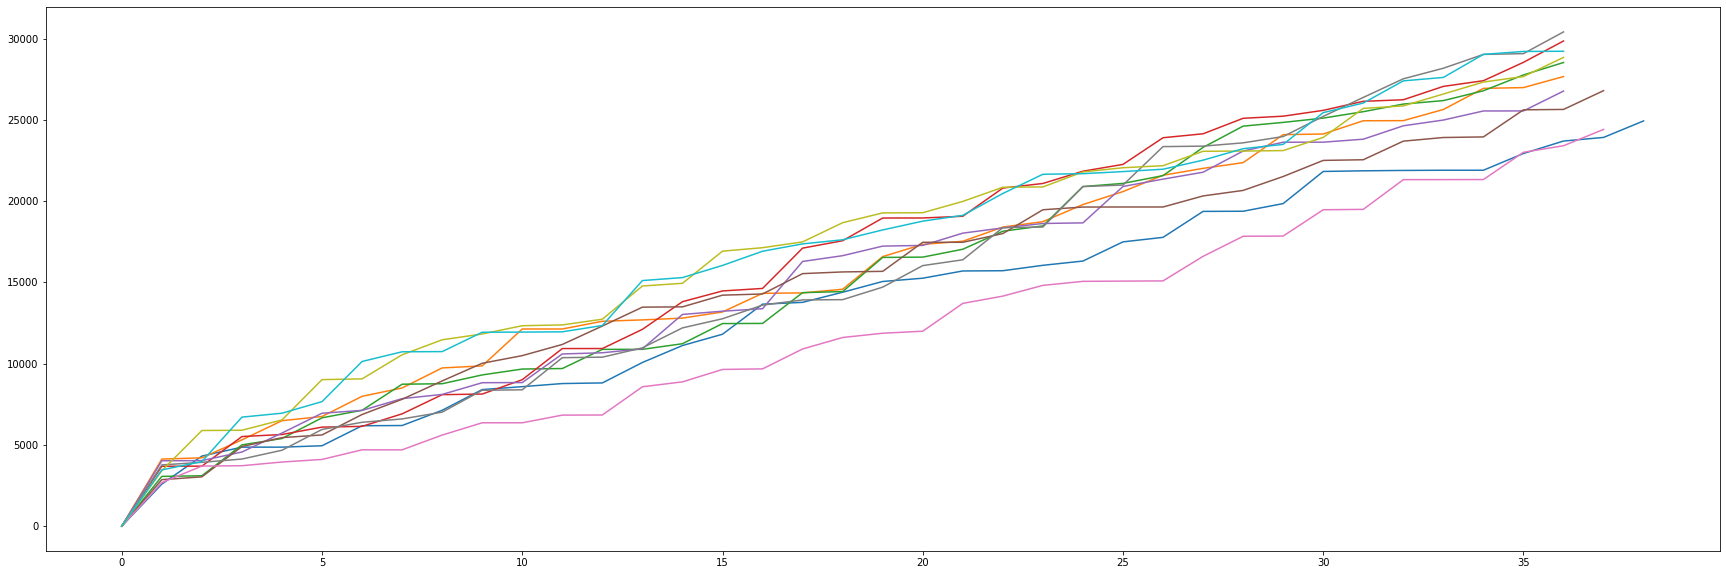

In [ ]:
resultados_hc_p3 = []

for i in range(0, 10):
  resultado_hc_p3 = hill_climbing_p3(inicial_p3, vizinho_p3, cost_function_p3, cidades38)

  print("Cidades Visitadas: " + str(resultado_hc_p3[0]))
  print("Custo total: " + str(resultado_hc_p3[1]))

  resultados_hc_p3.append(resultado_hc_p3[2])

  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,len(resultado_hc_p3[2])), y=resultado_hc_p3[2])

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_hc_p3 = []
for i in range(0,10):
  ultimos_resultados_hc_p3.append(resultados_hc_p3[i][-1])

resultados_finais_p3.append([algoritmos[0], max(ultimos_resultados_hc_p3), min(ultimos_resultados_hc_p3), np.average(ultimos_resultados_hc_p3), np.std(ultimos_resultados_hc_p3)])

####Hill Climbing com restart

Cidades Visitadas: [(11003.6111, 42102.5), (12421.6667, 42895.5556), (11600.0, 43150.0), (11569.4444, 43136.6667), (11461.1111, 43252.7778), (11963.0556, 43290.5556), (12058.3333, 42195.5556), (11155.8333, 42712.5), (11690.5556, 42686.6667), (11297.5, 42853.3333), (12355.8333, 43156.3889), (11583.3333, 43150.0), (11108.6111, 42373.8889), (11416.6667, 42983.3333), (11785.2778, 42884.4444), (11751.1111, 42814.4444), (11423.8889, 43000.2778), (12300.0, 42433.3333), (11522.2222, 42841.9444), (11595.0, 43148.0556), (12363.3333, 43189.1667), (11133.3333, 42885.8333), (11973.0556, 43026.1111), (12372.7778, 42711.3889), (11503.0556, 42855.2778), (11846.9444, 42660.5556), (12286.9444, 43355.5556), (11715.8333, 41836.1111), (11770.2778, 42651.9444), (11822.7778, 42673.6111), (12149.4444, 42477.5), (12645.0, 42973.3333), (11438.3333, 42057.2222), (11183.3333, 42933.3333), (11310.2778, 42929.4444), (11485.5556, 43187.2222), (12386.6667, 43334.7222), [(11511.3889, 42106.3889)], (11003.6111, 42102.5

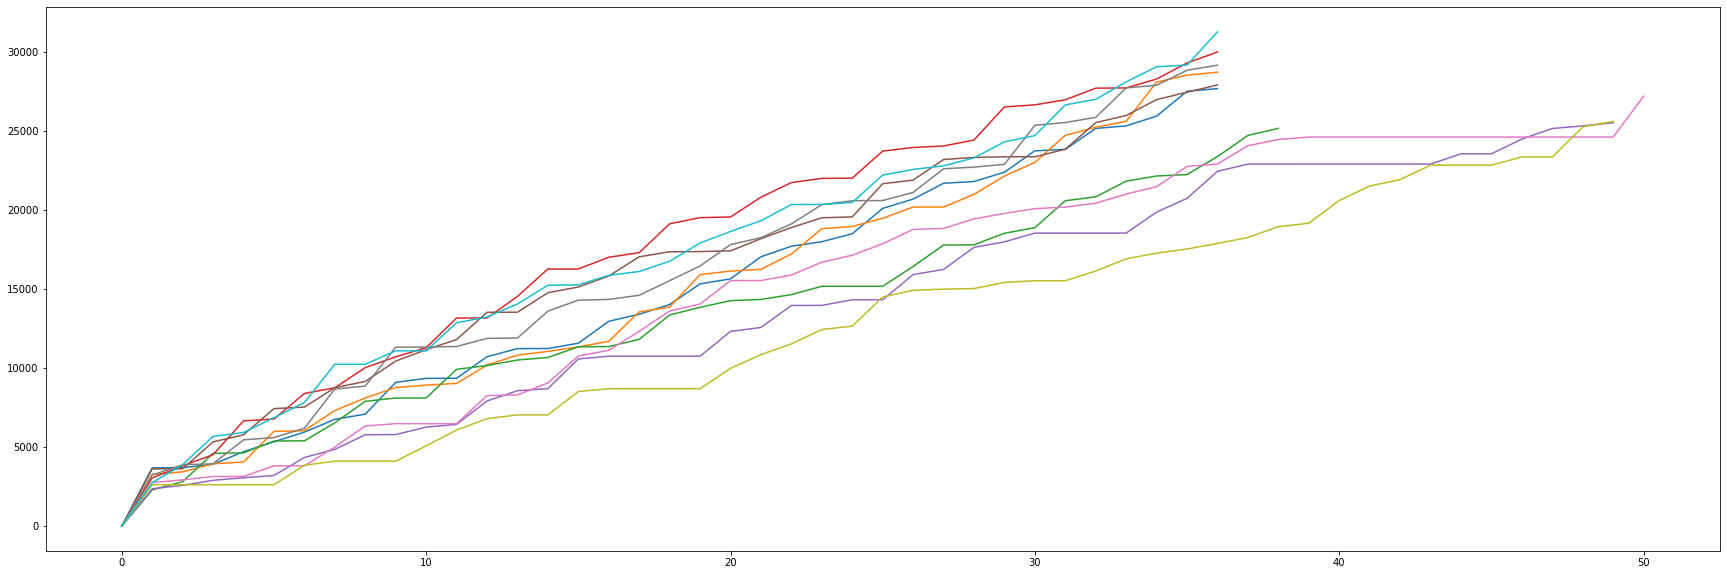

In [ ]:
resultados_hcr_p3 = []

for i in range(0, 10):
  resultado_hcr_p3 = hill_climbing_w_restart_p3(inicial_p3, vizinho_p3, cost_function_p3, cidades38)

  print("Cidades Visitadas: " + str(resultado_hcr_p3[0]))
  print("Custo total: " + str(resultado_hcr_p3[1]))

  resultados_hcr_p3.append(resultado_hcr_p3[2])
  
  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,len(resultado_hcr_p3[2])), y=resultado_hcr_p3[2])

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_hcr_p3 = []
for i in range(0,10):
  ultimos_resultados_hcr_p3.append(resultados_hcr_p3[i][-1])

resultados_finais_p3.append([algoritmos[1], max(ultimos_resultados_hcr_p3), min(ultimos_resultados_hcr_p3), np.average(ultimos_resultados_hcr_p3), np.std(ultimos_resultados_hcr_p3)])

####Simulated Annealing

Cidades Visitadas: [(11003.6111, 42102.5), (11569.4444, 43136.6667), (11155.8333, 42712.5), (11461.1111, 43252.7778), (12386.6667, 43334.7222), (12355.8333, 43156.3889), (11973.0556, 43026.1111), (11108.6111, 42373.8889), (11963.0556, 43290.5556), (11715.8333, 41836.1111), (11310.2778, 42929.4444), (12372.7778, 42711.3889), (11770.2778, 42651.9444), (11595.0, 43148.0556), (12421.6667, 42895.5556), (12300.0, 42433.3333), (11511.3889, 42106.3889), (11423.8889, 43000.2778), (12286.9444, 43355.5556), (12149.4444, 42477.5), (11297.5, 42853.3333), (11183.3333, 42933.3333), (11600.0, 43150.0), (11846.9444, 42660.5556), (11438.3333, 42057.2222), (11751.1111, 42814.4444), (11822.7778, 42673.6111), (12058.3333, 42195.5556), (11133.3333, 42885.8333), (12363.3333, 43189.1667), (11485.5556, 43187.2222), (11503.0556, 42855.2778), (11522.2222, 42841.9444), (12645.0, 42973.3333), (11583.3333, 43150.0), (11416.6667, 42983.3333), (11785.2778, 42884.4444), [(11690.5556, 42686.6667)], (11003.6111, 42102.5

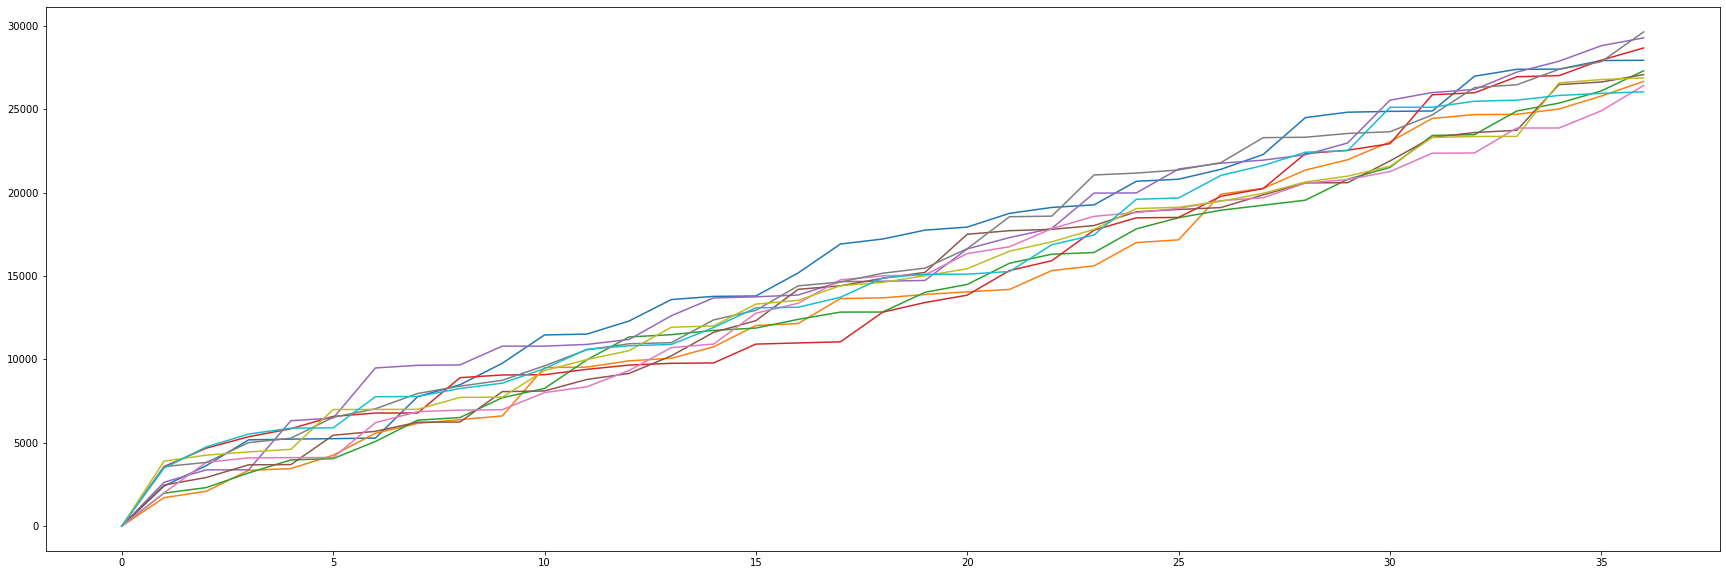

In [ ]:
resultados_sa_p3 = []

for i in range(0, 10):
  resultado_sa_p3 = simulated_annealing_p3(inicial_p3, vizinho_p3, cost_function_p3, cidades38)

  print("Cidades Visitadas: " + str(resultado_sa_p3[0]))
  print("Custo total: " + str(resultado_sa_p3[1]))

  resultados_sa_p3.append(resultado_sa_p3[2])
  
  #Gráfico da evolução da fitness nas 10 execuções do algoritmo
  sns.lineplot(x=range(0,len(resultado_sa_p3[2])), y=resultado_sa_p3[2])

In [ ]:
#Armazena resultados para exibição do relatório ao final
ultimos_resultados_sa_p3 = []
for i in range(0,10):
  ultimos_resultados_sa_p3.append(resultados_sa_p3[i][-1])

resultados_finais_p3.append([algoritmos[2], max(ultimos_resultados_sa_p3), min(ultimos_resultados_sa_p3), np.average(ultimos_resultados_sa_p3), np.std(ultimos_resultados_sa_p3)])

####Tabela Comparativa

In [ ]:
relatorio_final_problema3 = DataFrame (resultados_finais_p3,columns=colunas_resultados_finais)
relatorio_final_problema3

,Algoritmo,Máximo,Mínimo,Média,Desvio Padrão
0,HILL CLIMBING,30411.859343,24411.318708,27743.636662,1908.482699
1,SIMULATED ANNEALING,29645.766078,26054.086460,27600.519412,1174.670387
2,HILL CLIMBING COM RESTART,31281.950422,25177.132334,27834.746036,1921.892106


####Discussão

Neste problema 3, foi necessário adaptar as funções de custo, busca de vizinhos e ponto inicial, assim como os próprios algoritmos de busca, por conta das características inerentes ao problema. 

Algumas situações ocorreram, as quais não consegui identificar a causa, por exemplo, eventuais loops infinitos no Hill Climbing (por conta disso limitei o número de loops).

Neste problema os três algoritmos que construí chegaram em mínimos de custo de percurso razoáveis, sendo que o Hill Climbing obteve um melhor resultado mínimo, porém a média de execuções do Simulated Annealing foi melhor que os demais.

